In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np
import scipy

# Read in data

In [2]:
bounded_1_to_2_experiments2222, bounded_1_to_2_outcomes2222 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed2222.gz')
bounded_1_to_2_experiments3333, bounded_1_to_2_outcomes3333 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed3333.gz')
bounded_1_to_2_experiments4444, bounded_1_to_2_outcomes4444 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed4444.gz')
bounded_1_to_2_experiments5555, bounded_1_to_2_outcomes5555 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed5555.gz')
bounded_1_to_2_experiments6666, bounded_1_to_2_outcomes6666 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start1_to_2_seed6666.gz')

bounded_2_to_1_experiments2222, bounded_2_to_1_outcomes2222 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed2222.gz')
bounded_2_to_1_experiments3333, bounded_2_to_1_outcomes3333 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed3333.gz')
bounded_2_to_1_experiments4444, bounded_2_to_1_outcomes4444 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed4444.gz')
bounded_2_to_1_experiments5555, bounded_2_to_1_outcomes5555 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed5555.gz')
bounded_2_to_1_experiments6666, bounded_2_to_1_outcomes6666 = load_results('../../results/results_bounded_rational_run/results_200_scenarios_start2_to_1_seed6666.gz')

In [3]:
len(bounded_1_to_2_experiments2222)

200

In [4]:
bounded_1_to_2_experiments2222.keys()

Index(['num_of_paths', 'strategy_change_percentage', 'scenario', 'policy',
       'model'],
      dtype='object')

In [5]:
bounded_1_to_2_outcomes2222.keys()

dict_keys(['continuity_mean', 'continuity_vars', 'connectivity_mean', 'connectivity_vars', 'node_frequency_mean', 'node_frequency_var'])

In [6]:
bounded_1_to_2_outcomes2222['continuity_var'] = bounded_1_to_2_outcomes2222['continuity_vars']
bounded_1_to_2_outcomes3333['continuity_var'] = bounded_1_to_2_outcomes3333['continuity_vars']
bounded_1_to_2_outcomes4444['continuity_var'] = bounded_1_to_2_outcomes4444['continuity_vars']
bounded_1_to_2_outcomes5555['continuity_var'] = bounded_1_to_2_outcomes5555['continuity_vars']
bounded_1_to_2_outcomes6666['continuity_var'] = bounded_1_to_2_outcomes6666['continuity_vars']

bounded_2_to_1_outcomes2222['continuity_var'] = bounded_2_to_1_outcomes2222['continuity_vars']
bounded_2_to_1_outcomes3333['continuity_var'] = bounded_2_to_1_outcomes3333['continuity_vars']
bounded_2_to_1_outcomes4444['continuity_var'] = bounded_1_to_2_outcomes4444['continuity_vars']
bounded_2_to_1_outcomes5555['continuity_var'] = bounded_2_to_1_outcomes5555['continuity_vars']
bounded_2_to_1_outcomes6666['continuity_var'] = bounded_2_to_1_outcomes6666['continuity_vars']

bounded_1_to_2_outcomes2222['connectivity_var'] = bounded_1_to_2_outcomes2222['connectivity_vars']
bounded_1_to_2_outcomes3333['connectivity_var'] = bounded_1_to_2_outcomes3333['connectivity_vars']
bounded_1_to_2_outcomes4444['connectivity_var'] = bounded_1_to_2_outcomes4444['connectivity_vars']
bounded_1_to_2_outcomes5555['connectivity_var'] = bounded_1_to_2_outcomes5555['connectivity_vars']
bounded_1_to_2_outcomes6666['connectivity_var'] = bounded_1_to_2_outcomes6666['connectivity_vars']

bounded_2_to_1_outcomes2222['connectivity_var'] = bounded_2_to_1_outcomes2222['connectivity_vars']
bounded_2_to_1_outcomes3333['connectivity_var'] = bounded_2_to_1_outcomes3333['connectivity_vars']
bounded_2_to_1_outcomes4444['connectivity_var'] = bounded_2_to_1_outcomes4444['connectivity_vars']
bounded_2_to_1_outcomes5555['connectivity_var'] = bounded_2_to_1_outcomes5555['connectivity_vars']
bounded_2_to_1_outcomes6666['connectivity_var'] = bounded_2_to_1_outcomes6666['connectivity_vars']

In [7]:
bounded_1_to_2_outcomes2222.pop('continuity_vars')
bounded_1_to_2_outcomes3333.pop('continuity_vars')
bounded_1_to_2_outcomes4444.pop('continuity_vars')
bounded_1_to_2_outcomes5555.pop('continuity_vars')
bounded_1_to_2_outcomes6666.pop('continuity_vars')

bounded_2_to_1_outcomes2222.pop('continuity_vars')
bounded_2_to_1_outcomes3333.pop('continuity_vars')
bounded_2_to_1_outcomes4444.pop('continuity_vars')
bounded_2_to_1_outcomes5555.pop('continuity_vars')
bounded_2_to_1_outcomes6666.pop('continuity_vars')

bounded_1_to_2_outcomes2222.pop('connectivity_vars')
bounded_1_to_2_outcomes3333.pop('connectivity_vars')
bounded_1_to_2_outcomes4444.pop('connectivity_vars')
bounded_1_to_2_outcomes5555.pop('connectivity_vars')
bounded_1_to_2_outcomes6666.pop('connectivity_vars')

bounded_2_to_1_outcomes2222.pop('connectivity_vars')
bounded_2_to_1_outcomes3333.pop('connectivity_vars')
bounded_2_to_1_outcomes4444.pop('connectivity_vars')
bounded_2_to_1_outcomes5555.pop('connectivity_vars')
bounded_2_to_1_outcomes6666.pop('connectivity_vars')

array([2.20252364, 2.23922099, 2.25750434, 2.17993075, 2.15466463,
       2.15359173, 2.1850939 , 2.39399754, 2.27578729, 2.15869162,
       2.15869162, 2.30120309, 2.32440744, 2.1850939 , 2.17291472,
       2.17154673, 2.16512567, 2.25750434, 2.16288136, 2.20252364,
       2.21033395, 2.30120309, 2.23922099, 2.1850939 , 2.27578729,
       2.16192796, 2.25750434, 2.27578729, 2.15359173, 2.27578729,
       2.23922099, 2.16192796, 2.15359173, 2.15695409, 2.15695409,
       2.17993075, 2.15869162, 2.19194754, 2.1997491 , 2.15869162,
       2.17291472, 2.17291472, 2.15466463, 2.32440744, 2.20252364,
       2.30120309, 2.17154673, 2.25750434, 2.15466463, 2.16774542,
       2.17993075, 2.16774542, 2.17154673, 2.21033395, 2.25750434,
       2.15695409, 2.15695409, 2.17291472, 2.15359173, 2.16288136,
       2.17154673, 2.1997491 , 2.19194754, 2.23922099, 2.30120309,
       2.39399754, 2.16774542, 2.17291472, 2.21033395, 2.1997491 ,
       2.21033395, 2.1833469 , 2.15695409, 2.16512567, 2.16192

In [8]:
outcomes_change = bounded_1_to_2_outcomes2222
bounded_1_to_2_outcomes2222 = {}
bounded_1_to_2_outcomes2222["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes2222["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes2222["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes2222["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes2222["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes2222["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [9]:
outcomes_change = bounded_1_to_2_outcomes3333
bounded_1_to_2_outcomes3333 = {}
bounded_1_to_2_outcomes3333["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes3333["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes3333["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes3333["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes3333["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes3333["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [10]:
outcomes_change = bounded_1_to_2_outcomes4444
bounded_1_to_2_outcomes4444 = {}
bounded_1_to_2_outcomes4444["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes4444["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes4444["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes4444["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes4444["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes4444["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [11]:
outcomes_change = bounded_1_to_2_outcomes5555
bounded_1_to_2_outcomes5555 = {}
bounded_1_to_2_outcomes5555["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes5555["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes5555["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes5555["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes5555["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes5555["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [12]:
outcomes_change = bounded_1_to_2_outcomes6666
bounded_1_to_2_outcomes6666 = {}
bounded_1_to_2_outcomes6666["continuity_mean"] = outcomes_change['continuity_mean']
bounded_1_to_2_outcomes6666["continuity_var"] = outcomes_change['continuity_var']
bounded_1_to_2_outcomes6666["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_1_to_2_outcomes6666["connectivity_var"] = outcomes_change['connectivity_var']
bounded_1_to_2_outcomes6666["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_1_to_2_outcomes6666["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [13]:
outcomes_change = bounded_2_to_1_outcomes2222
bounded_2_to_1_outcomes2222 = {}
bounded_2_to_1_outcomes2222["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes2222["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes2222["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes2222["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes2222["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes2222["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [14]:
outcomes_change = bounded_2_to_1_outcomes3333
bounded_2_to_1_outcomes3333 = {}
bounded_2_to_1_outcomes3333["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes3333["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes3333["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes3333["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes3333["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes3333["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [15]:
outcomes_change = bounded_2_to_1_outcomes4444
bounded_2_to_1_outcomes4444 = {}
bounded_2_to_1_outcomes4444["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes4444["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes4444["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes4444["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes4444["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes4444["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [16]:
outcomes_change = bounded_2_to_1_outcomes5555
bounded_2_to_1_outcomes5555 = {}
bounded_2_to_1_outcomes5555["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes5555["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes5555["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes5555["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes5555["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes5555["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [17]:
outcomes_change = bounded_2_to_1_outcomes6666
bounded_2_to_1_outcomes6666 = {}
bounded_2_to_1_outcomes6666["continuity_mean"] = outcomes_change['continuity_mean']
bounded_2_to_1_outcomes6666["continuity_var"] = outcomes_change['continuity_var']
bounded_2_to_1_outcomes6666["connectivity_mean"] = outcomes_change['connectivity_mean']
bounded_2_to_1_outcomes6666["connectivity_var"] = outcomes_change['connectivity_var']
bounded_2_to_1_outcomes6666["vertex_frequency_mean"] = outcomes_change['node_frequency_mean']
bounded_2_to_1_outcomes6666["vertex_frequency_var"] = outcomes_change['node_frequency_var']

In [18]:
bounded_1_to_2_experiments2222 = bounded_1_to_2_experiments2222.rename(columns={"strategy_change_percentage": "strategy_change_time"})

In [19]:
bounded_1_to_2_experiments3333 = bounded_1_to_2_experiments3333.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_1_to_2_experiments4444 = bounded_1_to_2_experiments4444.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_1_to_2_experiments5555 = bounded_1_to_2_experiments5555.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_1_to_2_experiments6666 = bounded_1_to_2_experiments6666.rename(columns={"strategy_change_percentage": "strategy_change_time"})

bounded_2_to_1_experiments2222 = bounded_2_to_1_experiments2222.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_2_to_1_experiments3333 = bounded_2_to_1_experiments3333.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_2_to_1_experiments4444 = bounded_2_to_1_experiments4444.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_2_to_1_experiments5555 = bounded_2_to_1_experiments5555.rename(columns={"strategy_change_percentage": "strategy_change_time"})
bounded_2_to_1_experiments6666 = bounded_2_to_1_experiments6666.rename(columns={"strategy_change_percentage": "strategy_change_time"})

### mean and variance

In [20]:
print(round(bounded_1_to_2_outcomes2222["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["continuity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes2222["continuity_mean"].std()/bounded_1_to_2_outcomes2222["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["continuity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes2222["continuity_var"].std()/bounded_1_to_2_outcomes2222["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["connectivity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes2222["connectivity_mean"].std()/bounded_1_to_2_outcomes2222["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["connectivity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes2222["connectivity_var"].std()/bounded_1_to_2_outcomes2222["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["vertex_frequency_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes2222["vertex_frequency_mean"].std()/bounded_1_to_2_outcomes2222["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["vertex_frequency_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes2222["vertex_frequency_var"].std(), 2))
print(round(bounded_1_to_2_outcomes2222["vertex_frequency_var"].std()/bounded_1_to_2_outcomes2222["vertex_frequency_var"].mean(), 2))

1.51
0.01
0.01
0.37
0.0
0.01
3.51
0.12
0.04
2.01
0.16
0.08
5.75
0.06
0.01
9.45
0.25
0.03


In [21]:
print(round(bounded_1_to_2_outcomes3333["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["continuity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes3333["continuity_mean"].std()/bounded_1_to_2_outcomes3333["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["continuity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes3333["continuity_var"].std()/bounded_1_to_2_outcomes3333["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["connectivity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes3333["connectivity_mean"].std()/bounded_1_to_2_outcomes3333["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["connectivity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes3333["connectivity_var"].std()/bounded_1_to_2_outcomes3333["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["vertex_frequency_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes3333["vertex_frequency_mean"].std()/bounded_1_to_2_outcomes3333["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["vertex_frequency_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes3333["vertex_frequency_var"].std(), 2))
print(round(bounded_1_to_2_outcomes3333["vertex_frequency_var"].std()/bounded_1_to_2_outcomes3333["vertex_frequency_var"].mean(), 2))

1.53
0.01
0.01
0.29
0.0
0.01
3.66
0.12
0.03
1.56
0.04
0.03
6.32
0.02
0.0
8.4
0.16
0.02


In [22]:
print(round(bounded_1_to_2_outcomes4444["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["continuity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes4444["continuity_mean"].std()/bounded_1_to_2_outcomes4444["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["continuity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes4444["continuity_var"].std()/bounded_1_to_2_outcomes4444["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["connectivity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes4444["connectivity_mean"].std()/bounded_1_to_2_outcomes4444["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["connectivity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes4444["connectivity_var"].std()/bounded_1_to_2_outcomes4444["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["vertex_frequency_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes4444["vertex_frequency_mean"].std()/bounded_1_to_2_outcomes4444["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["vertex_frequency_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes4444["vertex_frequency_var"].std(), 2))
print(round(bounded_1_to_2_outcomes4444["vertex_frequency_var"].std()/bounded_1_to_2_outcomes4444["vertex_frequency_var"].mean(), 2))

1.71
0.03
0.02
0.59
0.01
0.02
3.31
0.14
0.04
1.44
0.08
0.06
5.04
0.03
0.01
10.26
0.07
0.01


In [23]:
print(round(bounded_1_to_2_outcomes5555["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["continuity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes5555["continuity_mean"].std()/bounded_1_to_2_outcomes5555["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["continuity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes5555["continuity_var"].std()/bounded_1_to_2_outcomes5555["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["connectivity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes5555["connectivity_mean"].std()/bounded_1_to_2_outcomes5555["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["connectivity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes5555["connectivity_var"].std()/bounded_1_to_2_outcomes5555["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["vertex_frequency_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes5555["vertex_frequency_mean"].std()/bounded_1_to_2_outcomes5555["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["vertex_frequency_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes5555["vertex_frequency_var"].std(), 2))
print(round(bounded_1_to_2_outcomes5555["vertex_frequency_var"].std()/bounded_1_to_2_outcomes5555["vertex_frequency_var"].mean(), 2))

1.55
0.01
0.0
0.59
0.0
0.0
3.69
0.14
0.04
1.65
0.12
0.07
5.75
0.04
0.01
9.45
0.2
0.02


In [24]:
print(round(bounded_1_to_2_outcomes6666["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["continuity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes6666["continuity_mean"].std()/bounded_1_to_2_outcomes6666["continuity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["continuity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes6666["continuity_var"].std()/bounded_1_to_2_outcomes6666["continuity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["connectivity_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes6666["connectivity_mean"].std()/bounded_1_to_2_outcomes6666["connectivity_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["connectivity_var"].std(), 2))
print(round(bounded_1_to_2_outcomes6666["connectivity_var"].std()/bounded_1_to_2_outcomes6666["connectivity_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["vertex_frequency_mean"].std(), 2))
print(round(bounded_1_to_2_outcomes6666["vertex_frequency_mean"].std()/bounded_1_to_2_outcomes6666["vertex_frequency_mean"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["vertex_frequency_var"].mean(), 2))
print(round(bounded_1_to_2_outcomes6666["vertex_frequency_var"].std(), 2))
print(round(bounded_1_to_2_outcomes6666["vertex_frequency_var"].std()/bounded_1_to_2_outcomes6666["vertex_frequency_var"].mean(), 2))

1.68
0.01
0.01
0.52
0.01
0.01
3.48
0.15
0.04
1.56
0.07
0.04
5.38
0.02
0.0
9.9
0.14
0.01


In [25]:
print(round(bounded_2_to_1_outcomes2222["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["continuity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes2222["continuity_mean"].std()/bounded_2_to_1_outcomes2222["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["continuity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes2222["continuity_var"].std()/bounded_2_to_1_outcomes2222["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["connectivity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes2222["connectivity_mean"].std()/bounded_2_to_1_outcomes2222["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["connectivity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes2222["connectivity_var"].std()/bounded_2_to_1_outcomes2222["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["vertex_frequency_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes2222["vertex_frequency_mean"].std()/bounded_2_to_1_outcomes2222["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["vertex_frequency_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes2222["vertex_frequency_var"].std(), 2))
print(round(bounded_2_to_1_outcomes2222["vertex_frequency_var"].std()/bounded_2_to_1_outcomes2222["vertex_frequency_var"].mean(), 2))

2.76
0.01
0.0
1.58
0.01
0.0
4.24
0.16
0.04
2.35
0.06
0.02
5.55
0.02
0.0
8.84
0.09
0.01


In [26]:
print(round(bounded_2_to_1_outcomes3333["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["continuity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes3333["continuity_mean"].std()/bounded_2_to_1_outcomes3333["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["continuity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes3333["continuity_var"].std()/bounded_2_to_1_outcomes3333["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["connectivity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes3333["connectivity_mean"].std()/bounded_2_to_1_outcomes3333["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["connectivity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes3333["connectivity_var"].std()/bounded_2_to_1_outcomes3333["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["vertex_frequency_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes3333["vertex_frequency_mean"].std()/bounded_2_to_1_outcomes3333["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["vertex_frequency_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes3333["vertex_frequency_var"].std(), 2))
print(round(bounded_2_to_1_outcomes3333["vertex_frequency_var"].std()/bounded_2_to_1_outcomes3333["vertex_frequency_var"].mean(), 2))

2.96
0.01
0.0
3.06
0.01
0.0
4.41
0.16
0.04
2.29
0.06
0.02
5.56
0.02
0.0
9.11
0.06
0.01


In [27]:
print(round(bounded_2_to_1_outcomes4444["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["continuity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes4444["continuity_mean"].std()/bounded_2_to_1_outcomes4444["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["continuity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes4444["continuity_var"].std()/bounded_2_to_1_outcomes4444["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["connectivity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes4444["connectivity_mean"].std()/bounded_2_to_1_outcomes4444["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["connectivity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes4444["connectivity_var"].std()/bounded_2_to_1_outcomes4444["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["vertex_frequency_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes4444["vertex_frequency_mean"].std()/bounded_2_to_1_outcomes4444["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["vertex_frequency_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes4444["vertex_frequency_var"].std(), 2))
print(round(bounded_2_to_1_outcomes4444["vertex_frequency_var"].std()/bounded_2_to_1_outcomes4444["vertex_frequency_var"].mean(), 2))

3.32
0.01
0.0
0.59
0.01
0.02
4.02
0.14
0.03
1.63
0.09
0.05
6.31
0.03
0.0
6.76
0.17
0.03


In [28]:
print(round(bounded_2_to_1_outcomes5555["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["continuity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes5555["continuity_mean"].std()/bounded_2_to_1_outcomes5555["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["continuity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes5555["continuity_var"].std()/bounded_2_to_1_outcomes5555["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["connectivity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes5555["connectivity_mean"].std()/bounded_2_to_1_outcomes5555["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["connectivity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes5555["connectivity_var"].std()/bounded_2_to_1_outcomes5555["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["vertex_frequency_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes5555["vertex_frequency_mean"].std()/bounded_2_to_1_outcomes5555["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["vertex_frequency_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes5555["vertex_frequency_var"].std(), 2))
print(round(bounded_2_to_1_outcomes5555["vertex_frequency_var"].std()/bounded_2_to_1_outcomes5555["vertex_frequency_var"].mean(), 2))

3.0
0.01
0.0
3.25
0.01
0.0
4.08
0.15
0.04
2.52
0.09
0.04
5.8
0.01
0.0
7.51
0.09
0.01


In [29]:
print(round(bounded_2_to_1_outcomes6666["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["continuity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes6666["continuity_mean"].std()/bounded_2_to_1_outcomes6666["continuity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["continuity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes6666["continuity_var"].std()/bounded_2_to_1_outcomes6666["continuity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["connectivity_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes6666["connectivity_mean"].std()/bounded_2_to_1_outcomes6666["connectivity_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["connectivity_var"].std(), 2))
print(round(bounded_2_to_1_outcomes6666["connectivity_var"].std()/bounded_2_to_1_outcomes6666["connectivity_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["vertex_frequency_mean"].std(), 2))
print(round(bounded_2_to_1_outcomes6666["vertex_frequency_mean"].std()/bounded_2_to_1_outcomes6666["vertex_frequency_mean"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["vertex_frequency_var"].mean(), 2))
print(round(bounded_2_to_1_outcomes6666["vertex_frequency_var"].std(), 2))
print(round(bounded_2_to_1_outcomes6666["vertex_frequency_var"].std()/bounded_2_to_1_outcomes6666["vertex_frequency_var"].mean(), 2))

3.47
0.01
0.0
2.98
0.02
0.01
4.07
0.17
0.04
2.2
0.06
0.03
5.96
0.01
0.0
8.82
0.04
0.0


## Code for making histograms

In [18]:
def make_histogram_full(outcome):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    histogram = pd.Series(outcome.get("continuity_mean"))
    axs[0, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 0].set_title("Continuity_mean")
    axs[0, 0].set_xlabel('Value')
    axs[0, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("continuity_var"))
    axs[0, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[0, 1].set_title("Continuity_vars")
    axs[0, 1].set_xlabel('Value')
    axs[0, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_mean"))
    axs[1, 0].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 0].set_title("Connectivity_mean")
    axs[1, 0].set_xlabel('Value')
    axs[1, 0].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("connectivity_var"))
    axs[1, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[1, 1].set_title("Connectivity_vars")
    axs[1, 1].set_xlabel('Value')
    axs[1, 1].set_ylabel('Frequency')

    histogram = pd.Series(outcome.get("node_frequency_mean"))
    axs[2, 0].hist(histogram, bins=20, rwidth=0.9,
                          color='#607c8e')
    axs[2, 0].set_title("node_frequency_mean")
    axs[2, 0].set_xlabel('Value')
    axs[2, 0].set_ylabel('Frequency')


    histogram = pd.Series(outcome.get("node_frequency_var"))
    axs[2, 1].hist(histogram, bins=20, rwidth=0.9,
                           color='#607c8e')
    axs[2, 1].set_title("node_frequency_vars")
    axs[2, 1].set_xlabel('Value')
    axs[2, 1].set_ylabel('Frequency')

# strategy 1 to 2

## seed 2222

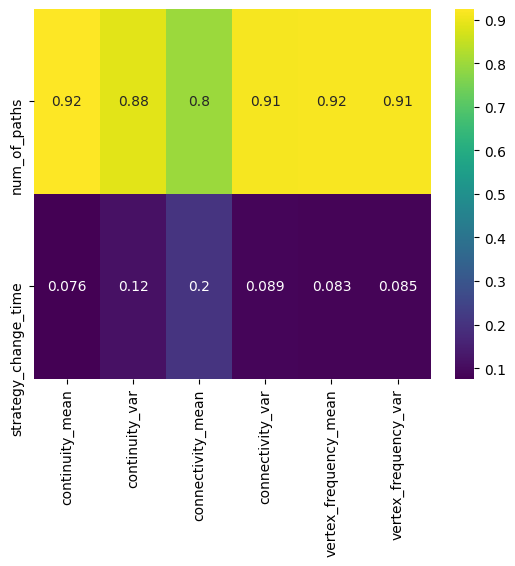

In [37]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments2222[['num_of_paths', 'strategy_change_time']], bounded_1_to_2_outcomes2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_seed2222.png', bbox_inches='tight')

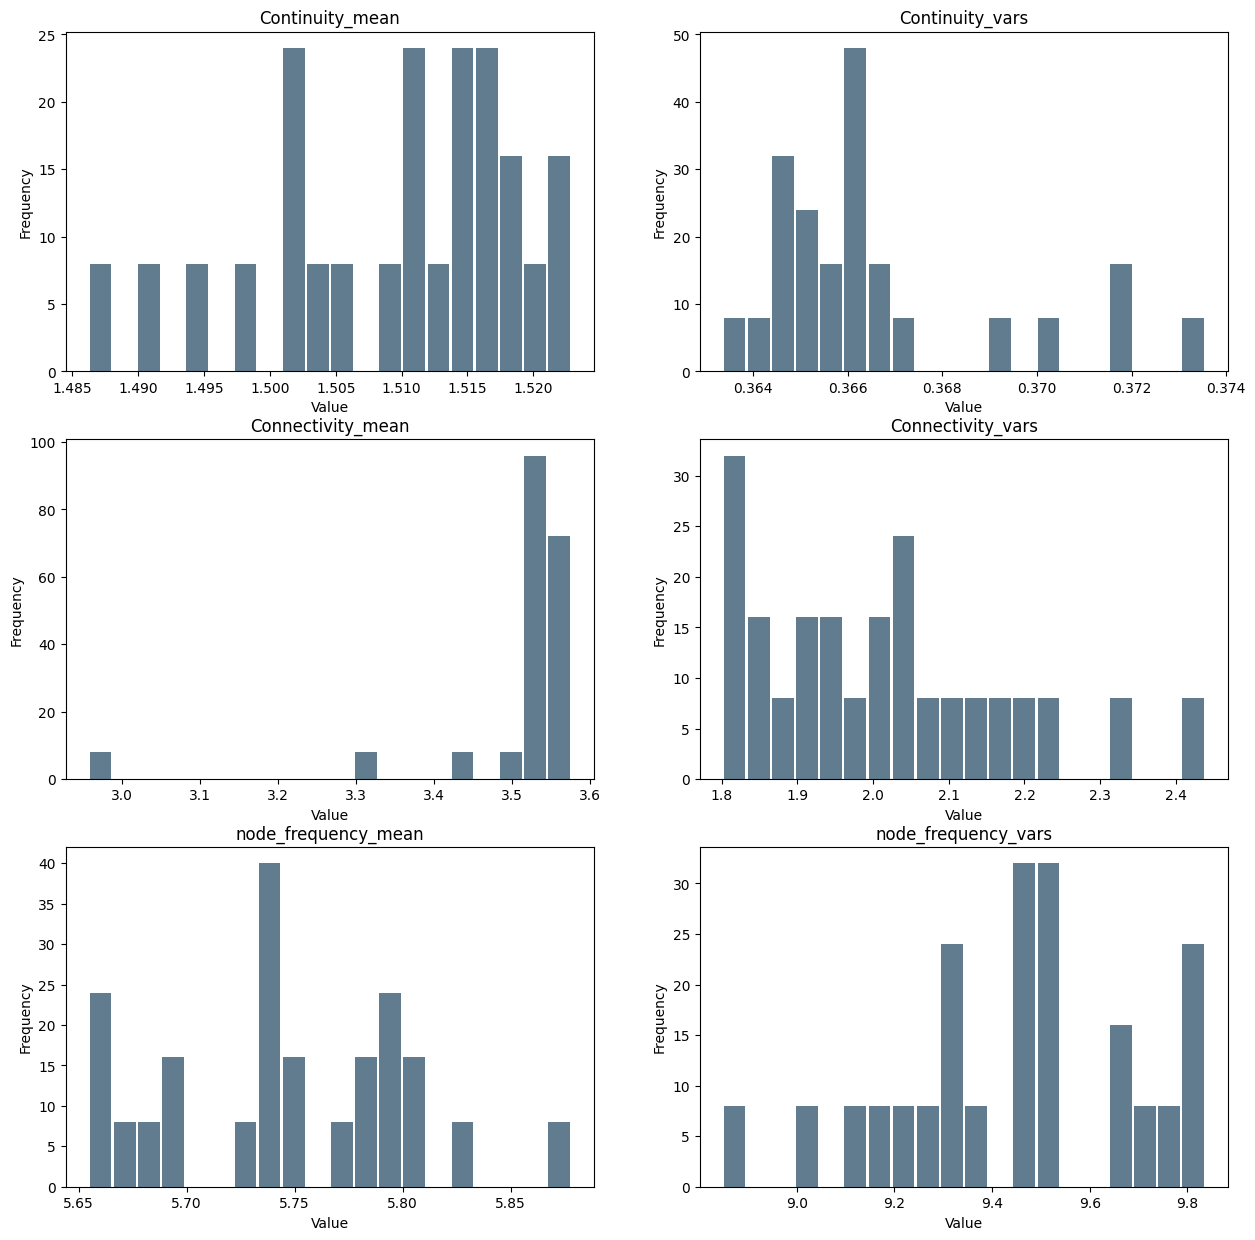

In [19]:
make_histogram_full(bounded_1_to_2_outcomes2222)

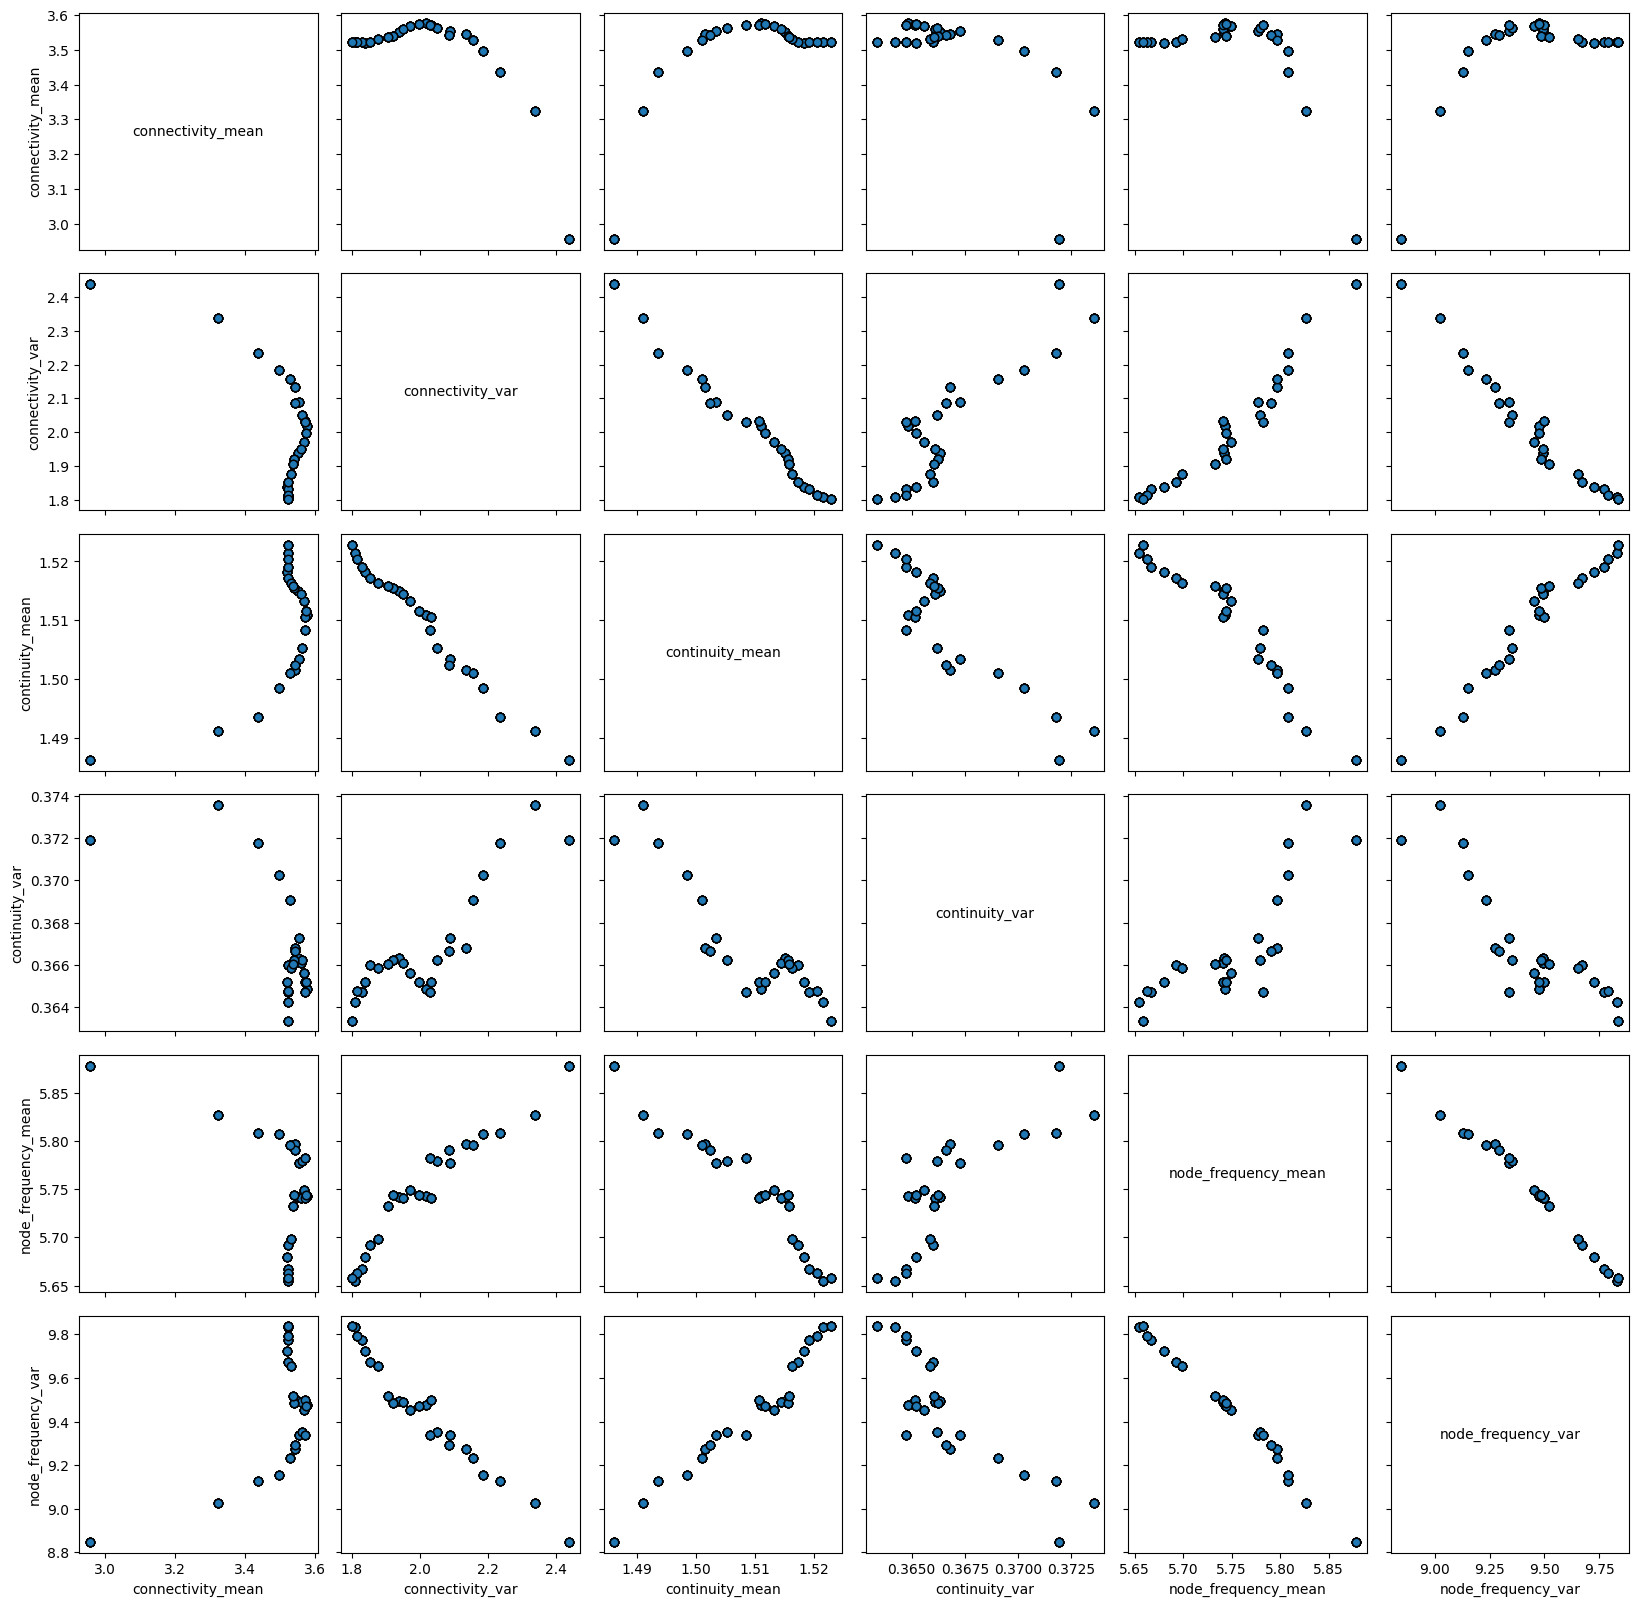

In [20]:
fig, axes = pairs_plotting.pairs_scatter(bounded_1_to_2_experiments2222, bounded_1_to_2_outcomes2222, legend=True)
fig.set_size_inches(20, 20)
plt.show()

In [ ]:
bounded_1_to_2_outcomes2222

In [21]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments2222[value1], bounded_1_to_2_outcomes2222[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments2222[value1], bounded_1_to_2_outcomes2222[value2])[1]
 

In [24]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.000,-0.653,-0.020,-0.987,-0.880,0.913
strategy_change_percentage,-0.029,-0.031,-0.055,0.026,0.014,-0.010


In [23]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,7.545266e-92,3.033200e-40,0.684358,1.819411e-89,1.488096e-71,6.217374e-77
strategy_change_percentage,5.529046e-01,5.194544e-01,0.255492,5.859217e-01,7.727548e-01,8.398889e-01


## Seed 3333

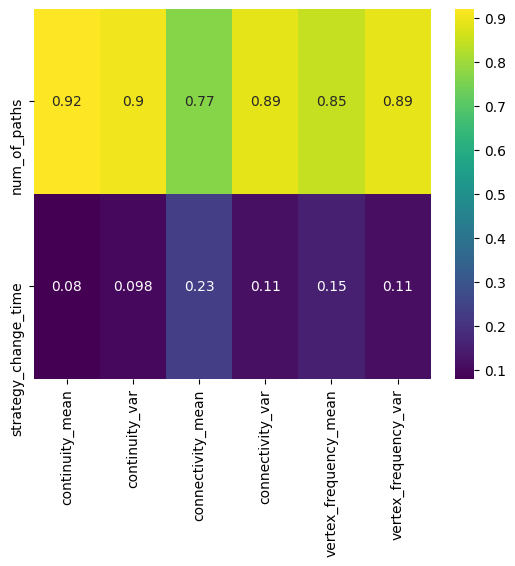

In [38]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments3333[['num_of_paths', 'strategy_change_time']], bounded_1_to_2_outcomes3333)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_seed3333.png', bbox_inches='tight')

In [26]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments3333[value1], bounded_1_to_2_outcomes3333[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments3333[value1], bounded_1_to_2_outcomes3333[value2])[1]
 

In [27]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.000,-0.793,-0.513,-0.853,-0.367,0.620
strategy_change_percentage,-0.029,0.020,0.023,0.012,0.086,-0.076


In [28]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,7.545266e-92,1.690609e-58,1.732370e-25,2.151515e-67,9.128782e-14,2.052534e-36
strategy_change_percentage,5.529046e-01,6.776247e-01,6.423867e-01,8.053244e-01,7.678343e-02,1.187074e-01


## Seed 4444

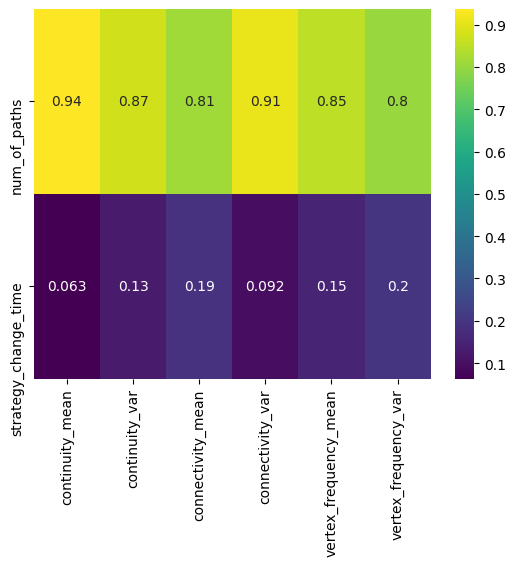

In [39]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments4444[['num_of_paths', 'strategy_change_time']], bounded_1_to_2_outcomes4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_seed4444.png', bbox_inches='tight')

In [29]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments4444[value1], bounded_1_to_2_outcomes4444[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments4444[value1], bounded_1_to_2_outcomes4444[value2])[1]
 

In [30]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.000,-0.593,0.36,-0.920,0.720,0.353
strategy_change_percentage,-0.029,0.061,-0.09,0.013,0.041,-0.113


In [31]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,7.545266e-92,1.713657e-33,2.527746e-13,4.942512e-78,1.683471e-48,6.874065e-13
strategy_change_percentage,5.529046e-01,2.077367e-01,6.369848e-02,7.841119e-01,3.944855e-01,2.012883e-02


## Seed 5555

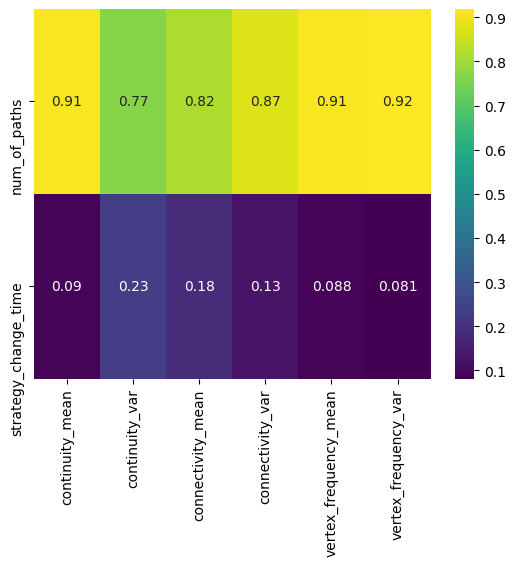

In [40]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments5555[['num_of_paths', 'strategy_change_time']], bounded_1_to_2_outcomes5555)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_seed5555.png', bbox_inches='tight')

In [32]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments5555[value1], bounded_1_to_2_outcomes5555[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments5555[value1], bounded_1_to_2_outcomes5555[value2])[1]
 

In [35]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.913,0.067,-0.067,-0.793,-0.707,0.860
strategy_change_percentage,-0.040,-0.112,-0.023,-0.019,0.028,-0.034


In [36]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,6.217374e-77,0.175392,0.175392,1.690609e-58,8.726297e-47,2.016694e-68
strategy_change_percentage,4.147595e-01,0.020703,0.628809,6.900537e-01,5.600040e-01,4.804756e-01


## Seed 6666

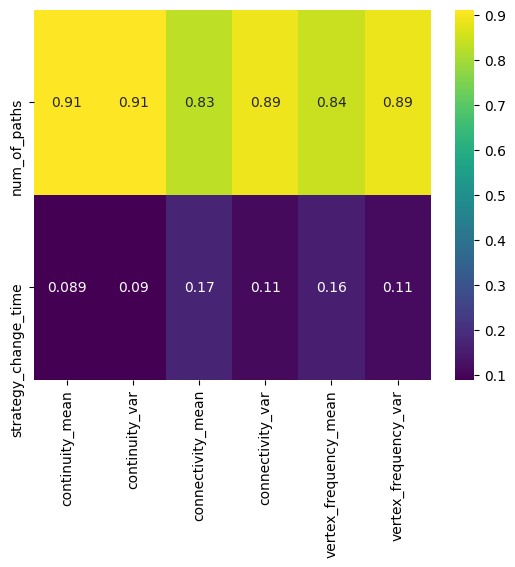

In [41]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments6666[['num_of_paths', 'strategy_change_time']], bounded_1_to_2_outcomes6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_seed6666.png', bbox_inches='tight')

In [37]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments6666[value1], bounded_1_to_2_outcomes6666[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments6666[value1], bounded_1_to_2_outcomes6666[value2])[1]
 

In [39]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.853,-0.84,-0.053,-0.973,-0.187,0.933
strategy_change_percentage,-0.026,0.03,-0.009,0.032,0.061,-0.031


In [40]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,2.151515e-67,2.317968e-65,0.278337,4.077243e-87,0.000148,2.956461e-80
strategy_change_percentage,5.902948e-01,5.304874e-01,0.849825,5.153478e-01,0.210806,5.222015e-01


## Combined results for strategy 1 to 2

In [20]:
outcomes_combined_1_to_2 = {}
outcomes_combined_1_to_2['continuity_mean'] = np.concatenate((bounded_1_to_2_outcomes2222['continuity_mean'], bounded_1_to_2_outcomes3333['continuity_mean'], bounded_1_to_2_outcomes4444['continuity_mean'], bounded_1_to_2_outcomes5555['continuity_mean'], bounded_1_to_2_outcomes6666['continuity_mean']))
outcomes_combined_1_to_2['continuity_var'] = np.concatenate((bounded_1_to_2_outcomes2222['continuity_var'], bounded_1_to_2_outcomes3333['continuity_var'], bounded_1_to_2_outcomes4444['continuity_var'], bounded_1_to_2_outcomes5555['continuity_var'], bounded_1_to_2_outcomes6666['continuity_var']))
outcomes_combined_1_to_2['connectivity_mean'] = np.concatenate((bounded_1_to_2_outcomes2222['connectivity_mean'], bounded_1_to_2_outcomes3333['connectivity_mean'], bounded_1_to_2_outcomes4444['connectivity_mean'], bounded_1_to_2_outcomes5555['connectivity_mean'], bounded_1_to_2_outcomes6666['connectivity_mean']))
outcomes_combined_1_to_2['connectivity_var'] = np.concatenate((bounded_1_to_2_outcomes2222['connectivity_var'], bounded_1_to_2_outcomes3333['connectivity_var'], bounded_1_to_2_outcomes4444['connectivity_var'], bounded_1_to_2_outcomes5555['connectivity_var'], bounded_1_to_2_outcomes6666['connectivity_var']))
outcomes_combined_1_to_2['vertex_frequency_mean'] = np.concatenate((bounded_1_to_2_outcomes2222['vertex_frequency_mean'], bounded_1_to_2_outcomes3333['vertex_frequency_mean'], bounded_1_to_2_outcomes4444['vertex_frequency_mean'], bounded_1_to_2_outcomes5555['vertex_frequency_mean'], bounded_1_to_2_outcomes6666['vertex_frequency_mean']))
outcomes_combined_1_to_2['vertex_frequency_var'] = np.concatenate((bounded_1_to_2_outcomes2222['vertex_frequency_var'], bounded_1_to_2_outcomes3333['vertex_frequency_var'], bounded_1_to_2_outcomes4444['vertex_frequency_var'], bounded_1_to_2_outcomes5555['vertex_frequency_var'], bounded_1_to_2_outcomes6666['vertex_frequency_var']))


In [21]:
bounded_1_to_2_experiments2222['Origin destination location set']=1
bounded_1_to_2_experiments3333['Origin destination location set']=2
bounded_1_to_2_experiments4444['Origin destination location set']=3
bounded_1_to_2_experiments5555['Origin destination location set']=4
bounded_1_to_2_experiments6666['Origin destination location set']=5


In [22]:
bounded_1_to_2_experiments_combined = pd.concat([bounded_1_to_2_experiments2222, bounded_1_to_2_experiments3333, bounded_1_to_2_experiments4444, bounded_1_to_2_experiments5555, bounded_1_to_2_experiments6666], ignore_index=True, sort=False)

In [23]:
bounded_1_to_2_experiments_combined['continuity_mean'] = outcomes_combined_1_to_2['continuity_mean']
bounded_1_to_2_experiments_combined['continuity_var'] = outcomes_combined_1_to_2['continuity_var']
bounded_1_to_2_experiments_combined['connectivity_mean'] = outcomes_combined_1_to_2['connectivity_mean']
bounded_1_to_2_experiments_combined['connectivity_var'] = outcomes_combined_1_to_2['connectivity_var']
bounded_1_to_2_experiments_combined['vertex_frequency_mean'] = outcomes_combined_1_to_2['vertex_frequency_mean']
bounded_1_to_2_experiments_combined['vertex_frequency_var'] = outcomes_combined_1_to_2['vertex_frequency_var']


In [24]:
bounded_1_to_2_experiments_combined.keys()

Index(['num_of_paths', 'strategy_change_time', 'scenario', 'policy', 'model',
       'Origin destination location set', 'continuity_mean', 'continuity_var',
       'connectivity_mean', 'connectivity_var', 'vertex_frequency_mean',
       'vertex_frequency_var'],
      dtype='object')

In [23]:
len(bounded_1_to_2_experiments_combined['continuity_mean'].unique())

125

## plotting results

In [26]:
column_names = ['num_of_paths', 'strategy_change_time', 'Origin destination location set']

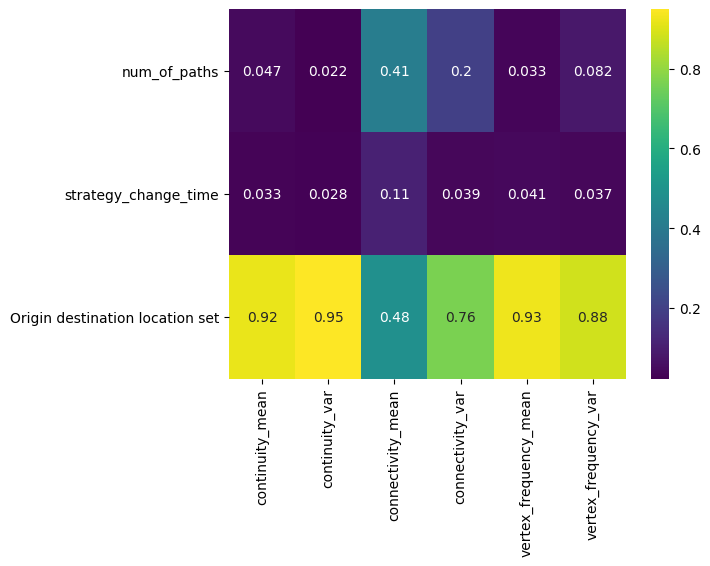

In [27]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments_combined[column_names], outcomes_combined_1_to_2).reindex(index = column_names)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_allseeds.png', bbox_inches='tight')

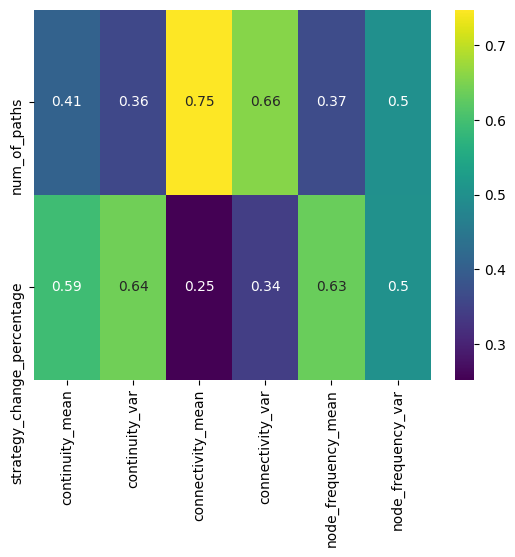

In [31]:
fs = feature_scoring.get_feature_scores_all(bounded_1_to_2_experiments_combined[['num_of_paths', 'strategy_change_percentage']], outcomes_combined_1_to_2)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_1_to_2_allseeds_noseed.png', bbox_inches='tight')

In [50]:
outcomes_combined_1_to_2_pd = pd.DataFrame.from_dict(outcomes_combined_1_to_2)
bounded_1_to_2_experiments_combined_with_outcomes = bounded_1_to_2_experiments_combined.copy()
for column in outcomes_combined_1_to_2_pd.columns:
    bounded_1_to_2_experiments_combined_with_outcomes[column] = outcomes_combined_1_to_2_pd[column]


In [51]:
bounded_1_to_2_experiments_combined_with_outcomes.columns

Index(['num_of_paths', 'strategy_change_time', 'scenario', 'policy', 'model',
       'Origin destination location set', 'continuity_mean', 'continuity_var',
       'connectivity_mean', 'connectivity_var', 'vertex_frequency_mean',
       'vertex_frequency_var'],
      dtype='object')

C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


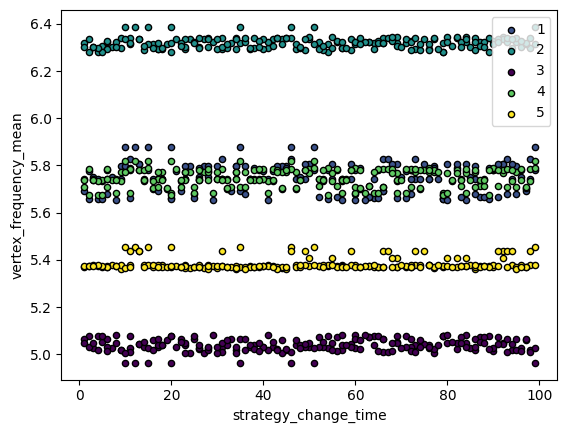

In [53]:
fig, ax = plt.subplots()
colors = {1:'#3b528b', 2:'#21918c', 3:'#440154', 4:'#5ec962', 5:'#fde725'}

grouped = bounded_1_to_2_experiments_combined_with_outcomes.groupby('Origin destination location set')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_time', y='vertex_frequency_mean', label=key, color=colors[key], edgecolor='black')
plt.savefig('bounded_1_to_2_scatter_nf_mean_strategy_percentage.png', bbox_inches='tight')

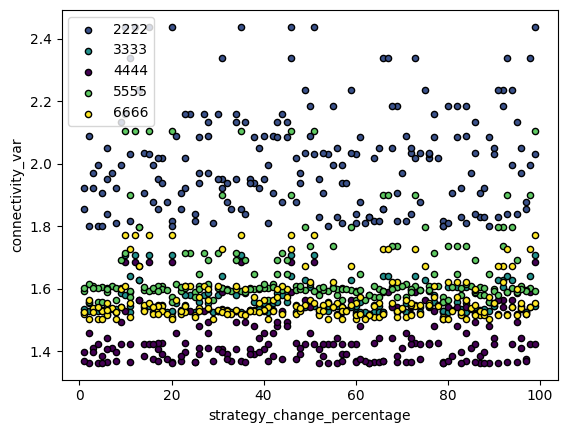

In [35]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_1_to_2_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='connectivity_var', label=key, color=colors[key], edgecolor='black')

plt.savefig('bounded_1_to_2_scatter_conn_var_strategy_percentage.png', bbox_inches='tight')

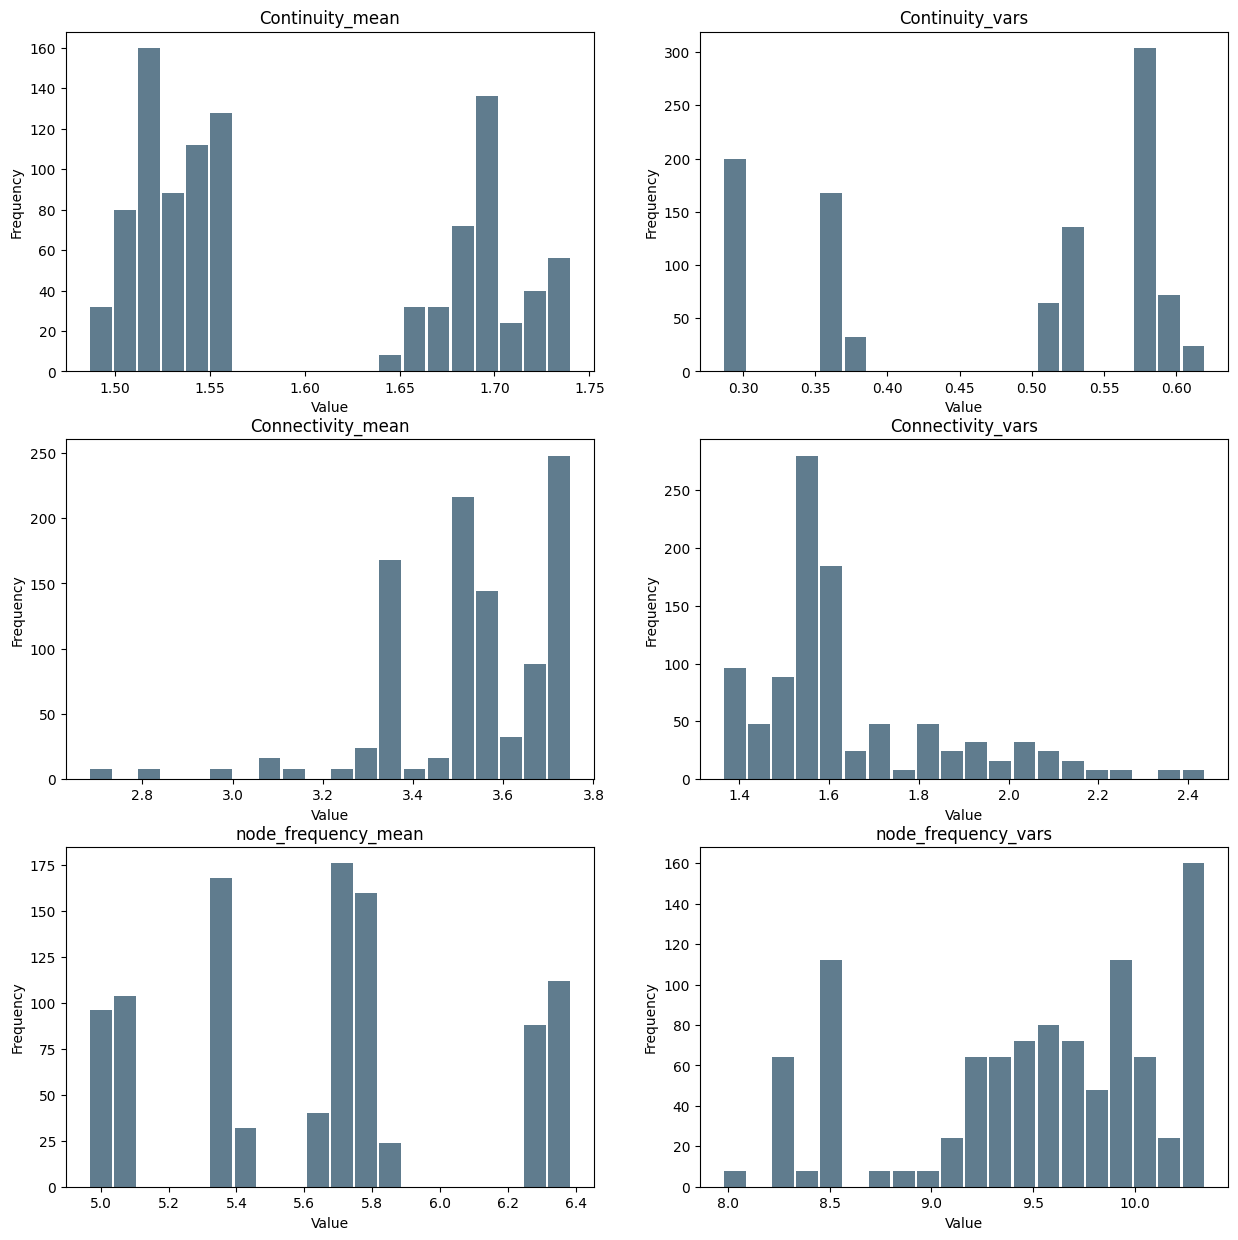

In [36]:
make_histogram_full(outcomes_combined_1_to_2)

In [22]:
bounded_1_to_2_experiments_combined.keys()

Index(['num_of_paths', 'strategy_change_percentage', 'scenario', 'policy',
       'model', 'seed'],
      dtype='object')

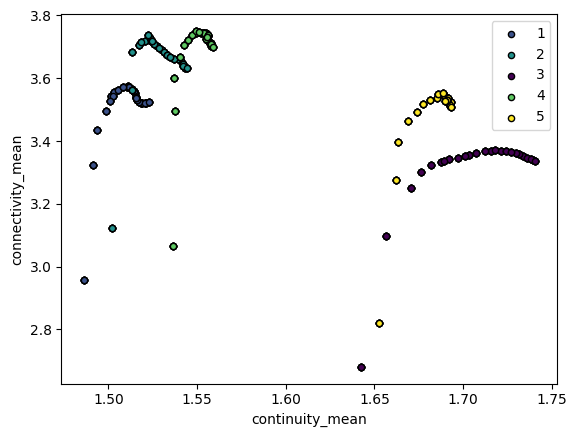

In [25]:
fig, ax = plt.subplots()
colors = {1:'#3b528b', 2:'#21918c', 3:'#440154', 4:'#5ec962', 5:'#fde725'}

grouped = bounded_1_to_2_experiments_combined_with_outcomes.groupby('Origin destination location set')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='continuity_mean', y='connectivity_mean', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_bounded_run_connectivity_mean_continuity_mean.png', bbox_inches='tight')

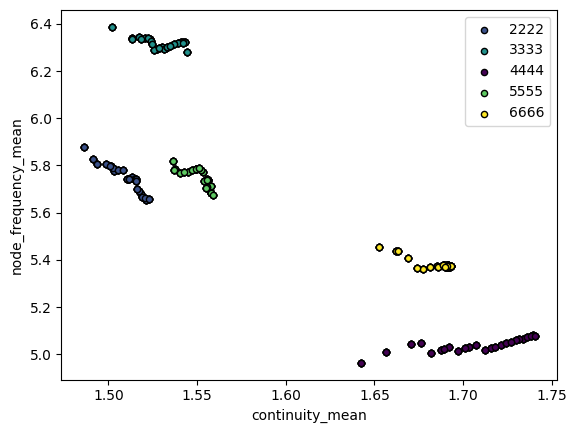

In [38]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_1_to_2_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='continuity_mean', y='node_frequency_mean', label=key, color=colors[key], edgecolor='black')

# plt.show()
plt.savefig('corr_bounded_run_connectivity_mean_node_frequency_mean.png', bbox_inches='tight')

In [27]:
outcomes_combined_1_to_2

{'continuity_mean': array([1.50336065, 1.50147852, 1.50098651, 1.5115959 , 1.52148369,
        1.52287924, 1.51096817, 1.48621993, 1.49851791, 1.51913007,
        1.51913007, 1.49360945, 1.49112167, 1.51096817, 1.51324272,
        1.51440168, 1.51716715, 1.50098651, 1.51580092, 1.50336065,
        1.50240241, 1.49360945, 1.50147852, 1.51096817, 1.49851791,
        1.51829421, 1.50098651, 1.49851791, 1.52287924, 1.49851791,
        1.50147852, 1.51829421, 1.52287924, 1.5203861 , 1.5203861 ,
        1.5115959 , 1.51913007, 1.50840195, 1.50524798, 1.51913007,
        1.51324272, 1.51324272, 1.52148369, 1.49112167, 1.50336065,
        1.49360945, 1.51440168, 1.50098651, 1.52148369, 1.51498092,
        1.5115959 , 1.51498092, 1.51440168, 1.50240241, 1.50098651,
        1.5203861 , 1.5203861 , 1.51324272, 1.52287924, 1.51580092,
        1.51440168, 1.50524798, 1.50840195, 1.50147852, 1.49360945,
        1.48621993, 1.51498092, 1.51324272, 1.50240241, 1.50524798,
        1.50240241, 1.5106370

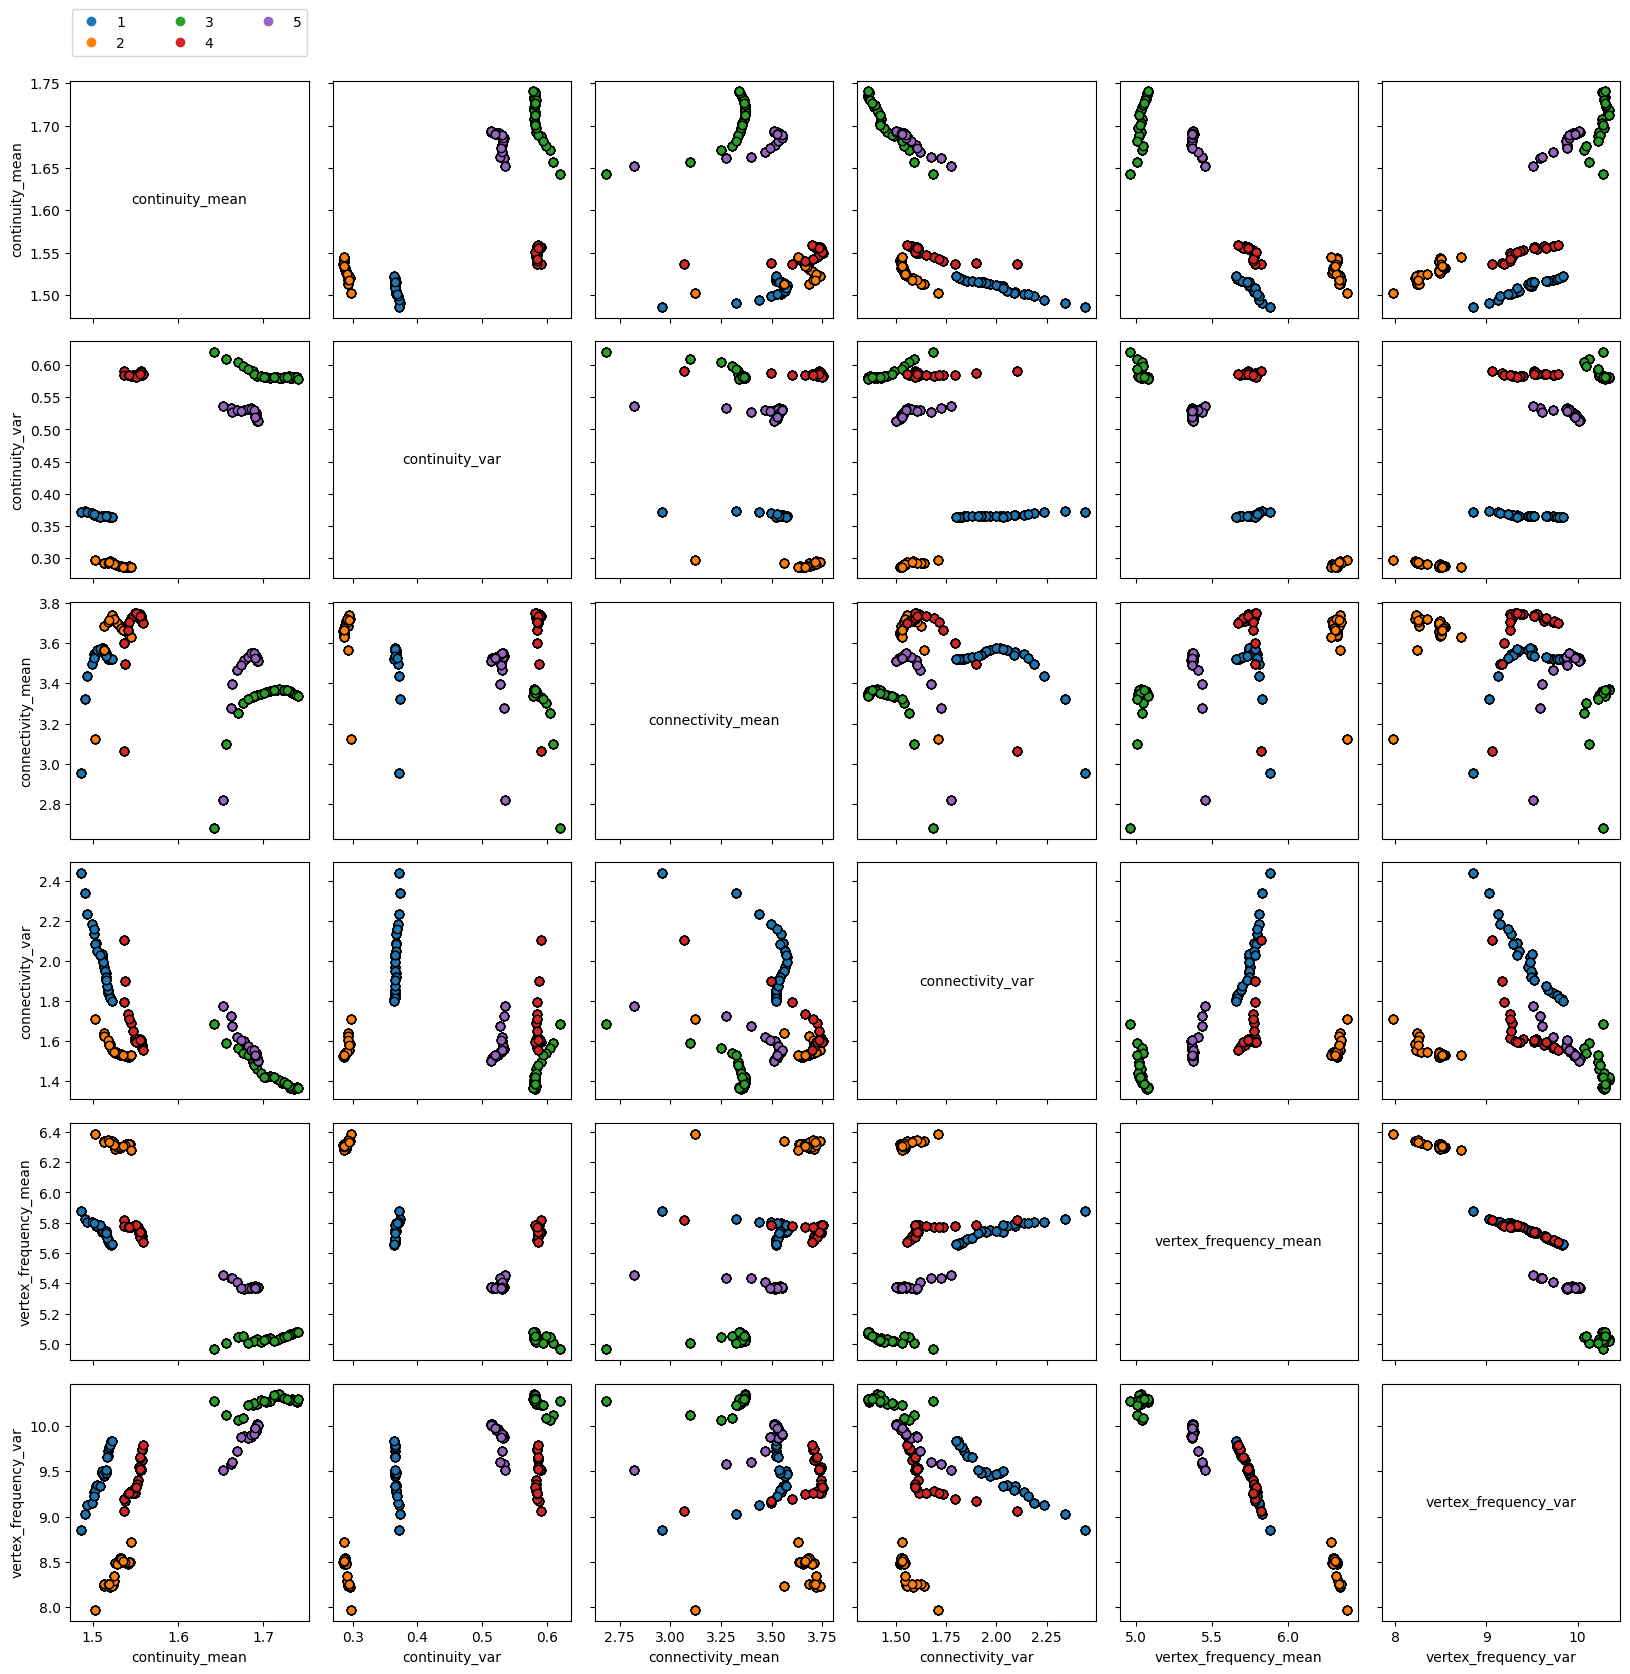

In [54]:
fig, axes = pairs_plotting.pairs_scatter(bounded_1_to_2_experiments_combined, outcomes_combined_1_to_2, group_by='Origin destination location set', grouping_specifiers = {1: 1, 2:2, 3:3, 4:4, 5:5}, legend=True)
fig.set_size_inches(20, 20)
# plt.show()

plt.savefig('corr_bounded_run_all.png', bbox_inches='tight')

### Correlation matrix

In [40]:
import scipy.stats

In [41]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments_combined[value1], outcomes_combined_1_to_2[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_1_to_2_experiments_combined[value1], outcomes_combined_1_to_2[value2])[1]
    

In [42]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.246066,-0.142708,0.073977,-0.353359,-0.119623,0.228752
strategy_change_percentage,-0.00885,0.000297,-0.002251,0.00908,0.010837,-0.013179


In [43]:
corr_mat.to_excel('corr_mat_bounded_run_1_to_2_exp_to_outcomes.xlsx')

In [44]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,4.604885e-30,3.931441e-11,0.000615,3.769844e-60,3.060891e-08,3.314037e-26
strategy_change_percentage,6.777456e-01,9.888805e-01,0.915812,6.698532e-01,6.108699e-01,5.360423e-01


In [45]:
p_mat.to_excel('p_mat_bounded_run_1_to_2_exp_to_outcomes.xlsx')

In [46]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_1_to_2[value1], outcomes_combined_1_to_2[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_1_to_2[value1], outcomes_combined_1_to_2[value2])[1]
 

In [47]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,1.000000,0.237935,-0.235871,-0.671226,-0.586581,0.655742
continuity_var,0.237935,1.000000,-0.181419,-0.009290,-0.422710,0.343226
connectivity_mean,-0.235871,-0.181419,1.000000,0.180129,0.473806,-0.444387
connectivity_var,-0.671226,-0.009290,0.180129,1.000000,0.329032,-0.409548
node_frequency_mean,-0.586581,-0.422710,0.473806,0.329032,1.000000,-0.882839
node_frequency_var,0.655742,0.343226,-0.444387,-0.409548,-0.882839,1.000000


In [48]:
corr_mat.to_excel('corr_mat_bounded_run_1_to_2_outcomes_to_outcomes.xlsx')

In [49]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,0.000000e+00,4.646019e-29,1.381903e-28,1.188680e-218,1.792101e-167,8.924031e-209
continuity_var,4.646019e-29,0.000000e+00,1.452483e-17,6.622141e-01,6.430041e-88,1.346533e-58
connectivity_mean,1.381903e-28,1.452483e-17,0.000000e+00,2.449772e-17,5.804922e-110,5.775085e-97
connectivity_var,1.188680e-218,6.622141e-01,2.449772e-17,0.000000e+00,5.356036e-54,1.205619e-82
node_frequency_mean,1.792101e-167,6.430041e-88,5.804922e-110,5.356036e-54,0.000000e+00,0.000000e+00
node_frequency_var,8.924031e-209,1.346533e-58,5.775085e-97,1.205619e-82,0.000000e+00,0.000000e+00


In [50]:
p_mat.to_excel('p_mat_bounded_run_1_to_2_outcomes_to_outcomes.xlsx')

# Strategy 2 to 1

## Seed 2222

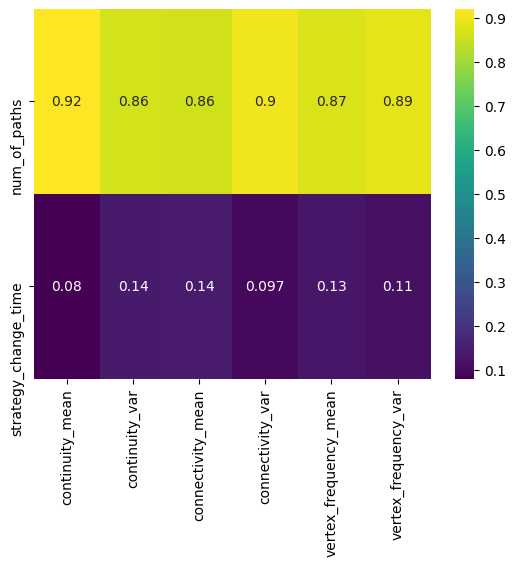

In [55]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments2222[['num_of_paths', 'strategy_change_time']], bounded_2_to_1_outcomes2222)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_seed2222.png', bbox_inches='tight')

In [41]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments2222[value1], bounded_2_to_1_outcomes2222[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments2222[value1], bounded_2_to_1_outcomes2222[value2])[1]
 

In [42]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.000,-0.553,0.833,-0.973,-0.500,0.747
strategy_change_percentage,-0.029,-0.023,-0.065,0.026,-0.014,0.024


In [43]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,7.545266e-92,2.391882e-29,2.340815e-64,4.077243e-87,2.897448e-24,5.031423e-52
strategy_change_percentage,5.529046e-01,6.363369e-01,1.808675e-01,5.902948e-01,7.792388e-01,6.168435e-01


## Seed 3333

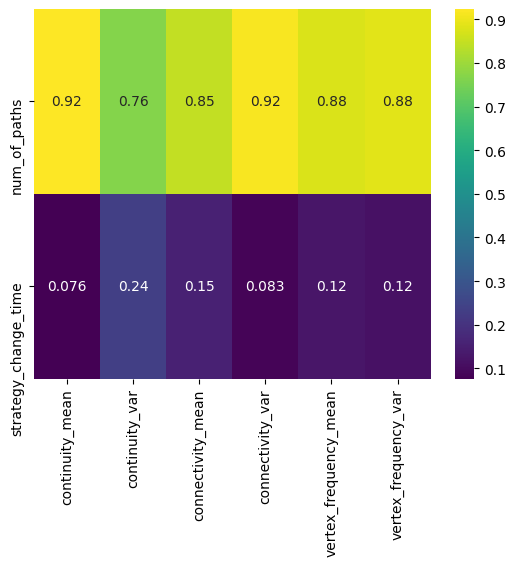

In [56]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments3333[['num_of_paths', 'strategy_change_time']], bounded_2_to_1_outcomes3333)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_seed3333.png', bbox_inches='tight')

In [44]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments3333[value1], bounded_2_to_1_outcomes3333[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments3333[value1], bounded_2_to_1_outcomes3333[value2])[1]
 

In [45]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.993,-0.240,0.753,-0.980,-0.213,0.687
strategy_change_percentage,-0.032,-0.026,-0.055,0.028,0.024,-0.003


In [46]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.182444e-90,0.000001,6.319916e-53,2.748693e-88,0.000014,2.839487e-44
strategy_change_percentage,5.153478e-01,0.597617,2.537275e-01,5.600040e-01,0.616844,9.586633e-01


## Seed 4444

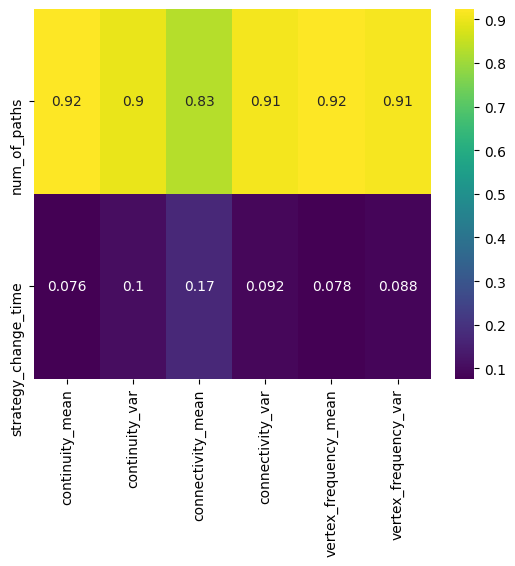

In [57]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments4444[['num_of_paths', 'strategy_change_time']], bounded_2_to_1_outcomes4444)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_seed4444.png', bbox_inches='tight')

In [47]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments4444[value1], bounded_2_to_1_outcomes4444[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments4444[value1], bounded_2_to_1_outcomes4444[value2])[1]
 

In [48]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.993,-0.593,0.393,-0.973,-0.887,0.880
strategy_change_percentage,-0.029,0.061,-0.081,0.031,0.022,-0.029


In [49]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.182444e-90,1.713657e-33,1.296115e-15,4.077243e-87,1.296367e-72,1.488096e-71
strategy_change_percentage,5.543209e-01,2.077367e-01,9.655913e-02,5.194544e-01,6.484603e-01,5.514900e-01


## Seed 5555

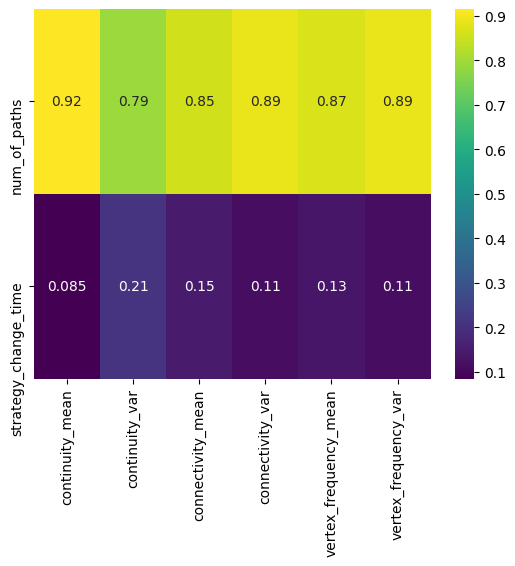

In [58]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments5555[['num_of_paths', 'strategy_change_time']], bounded_2_to_1_outcomes5555)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_seed5555.png', bbox_inches='tight')

In [51]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments5555[value1], bounded_2_to_1_outcomes5555[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments5555[value1], bounded_2_to_1_outcomes5555[value2])[1]
 

In [52]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.973,-0.293,0.427,-0.987,-0.373,0.593
strategy_change_percentage,-0.031,-0.039,-0.083,0.030,-0.004,0.034


In [53]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,4.077243e-87,2.486416e-09,4.227216e-18,1.819411e-89,3.237783e-14,1.713657e-33
strategy_change_percentage,5.263361e-01,4.220595e-01,8.757863e-02,5.402379e-01,9.367675e-01,4.870804e-01


## Seed 6666

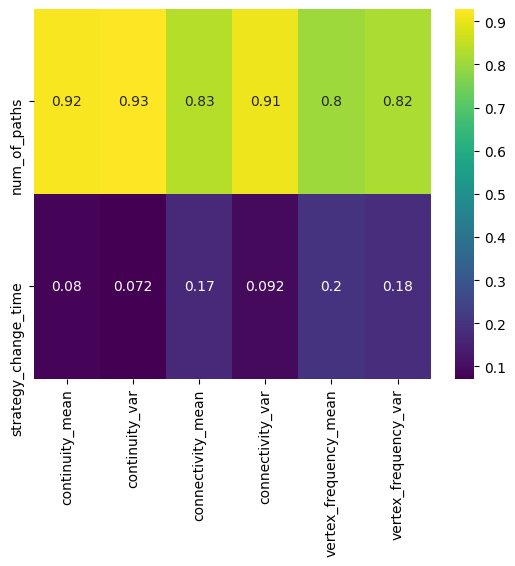

In [59]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments6666[['num_of_paths', 'strategy_change_time']], bounded_2_to_1_outcomes6666)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_seed6666.png', bbox_inches='tight')

In [54]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments6666[value1], bounded_2_to_1_outcomes6666[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments6666[value1], bounded_2_to_1_outcomes6666[value2])[1]
 

In [55]:
corr_mat.astype(float).round(3)

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.993,0.967,0.847,-0.96,-0.180,0.600
strategy_change_percentage,-0.030,-0.039,-0.025,0.03,-0.023,0.005


In [56]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.182444e-90,5.938168e-86,2.253721e-66,8.491491e-85,0.000253,3.276433e-34
strategy_change_percentage,5.388395e-01,4.196178e-01,6.123825e-01,5.388395e-01,0.636337,9.165980e-01


## Combined results strategy 2 to 1

In [28]:
outcomes_combined_2_to_1 = {}
outcomes_combined_2_to_1['continuity_mean'] = np.concatenate((bounded_2_to_1_outcomes2222['continuity_mean'], bounded_2_to_1_outcomes3333['continuity_mean'], bounded_2_to_1_outcomes4444['continuity_mean'], bounded_2_to_1_outcomes5555['continuity_mean'], bounded_2_to_1_outcomes6666['continuity_mean']))
outcomes_combined_2_to_1['continuity_var'] = np.concatenate((bounded_2_to_1_outcomes2222['continuity_var'], bounded_2_to_1_outcomes3333['continuity_var'], bounded_2_to_1_outcomes4444['continuity_var'], bounded_2_to_1_outcomes5555['continuity_var'], bounded_2_to_1_outcomes6666['continuity_var']))
outcomes_combined_2_to_1['connectivity_mean'] = np.concatenate((bounded_2_to_1_outcomes2222['connectivity_mean'], bounded_2_to_1_outcomes3333['connectivity_mean'], bounded_2_to_1_outcomes4444['connectivity_mean'], bounded_2_to_1_outcomes5555['connectivity_mean'], bounded_2_to_1_outcomes6666['connectivity_mean']))
outcomes_combined_2_to_1['connectivity_var'] = np.concatenate((bounded_2_to_1_outcomes2222['connectivity_var'], bounded_2_to_1_outcomes3333['connectivity_var'], bounded_2_to_1_outcomes4444['connectivity_var'], bounded_2_to_1_outcomes5555['connectivity_var'], bounded_2_to_1_outcomes6666['connectivity_var']))
outcomes_combined_2_to_1['vertex_frequency_mean'] = np.concatenate((bounded_2_to_1_outcomes2222['vertex_frequency_mean'], bounded_2_to_1_outcomes3333['vertex_frequency_mean'], bounded_2_to_1_outcomes4444['vertex_frequency_mean'], bounded_2_to_1_outcomes5555['vertex_frequency_mean'], bounded_2_to_1_outcomes6666['vertex_frequency_mean']))
outcomes_combined_2_to_1['vertex_frequency_var'] = np.concatenate((bounded_2_to_1_outcomes2222['vertex_frequency_var'], bounded_2_to_1_outcomes3333['vertex_frequency_var'], bounded_2_to_1_outcomes4444['vertex_frequency_var'], bounded_2_to_1_outcomes5555['vertex_frequency_var'], bounded_2_to_1_outcomes6666['vertex_frequency_var']))


In [29]:
bounded_2_to_1_experiments2222['Origin destination location set']=1
bounded_2_to_1_experiments3333['Origin destination location set']=2
bounded_2_to_1_experiments4444['Origin destination location set']=3
bounded_2_to_1_experiments5555['Origin destination location set']=4
bounded_2_to_1_experiments6666['Origin destination location set']=5


In [30]:
bounded_2_to_1_experiments_combined = pd.concat([bounded_2_to_1_experiments2222, bounded_2_to_1_experiments3333, bounded_2_to_1_experiments4444, bounded_2_to_1_experiments5555, bounded_2_to_1_experiments6666], ignore_index=True, sort=False)

## Plotting results

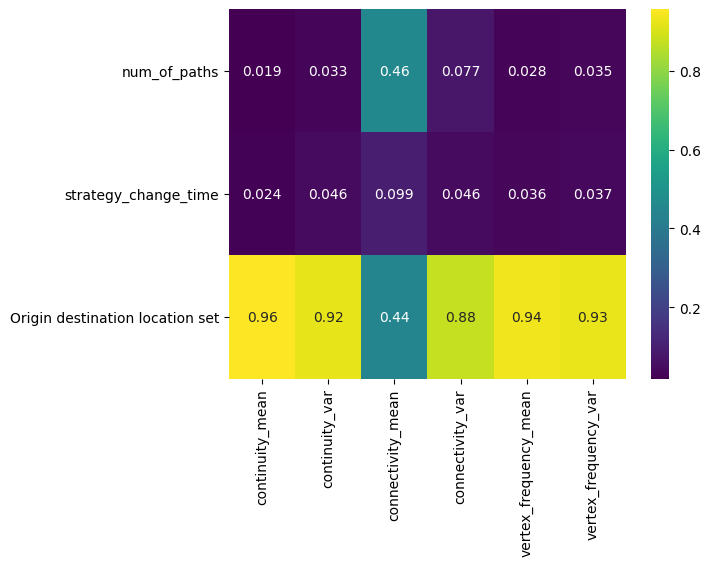

In [31]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments_combined[column_names], outcomes_combined_2_to_1).reindex(index = column_names)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_allseeds.png', bbox_inches='tight')

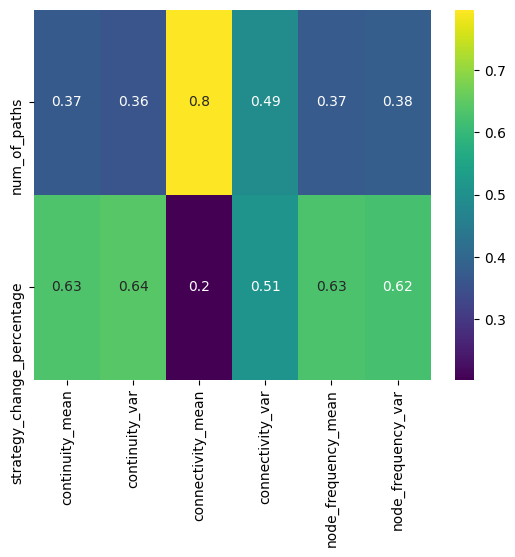

In [60]:
fs = feature_scoring.get_feature_scores_all(bounded_2_to_1_experiments_combined[['num_of_paths', 'strategy_change_percentage']], outcomes_combined_2_to_1)
heatmap = sns.heatmap(fs.rename_axis(index=None, columns=None), cmap="viridis", annot=True)
plt.savefig('bounded_ETRF_2_to_1_allseeds_noseed.png', bbox_inches='tight')

In [61]:
outcomes_combined_2_to_1_pd = pd.DataFrame.from_dict(outcomes_combined_2_to_1)
bounded_2_to_1_experiments_combined_with_outcomes = bounded_2_to_1_experiments_combined.copy()
for column in outcomes_combined_2_to_1_pd.columns:
    bounded_2_to_1_experiments_combined_with_outcomes[column] = outcomes_combined_2_to_1_pd[column]


C:\Users\Willemijn Tutuarima\miniconda3\envs\gds\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


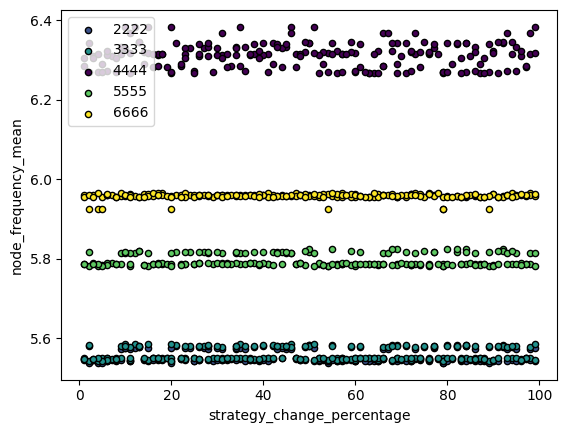

In [62]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_2_to_1_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='node_frequency_mean', label=key, color=colors[key], edgecolor='black')
plt.savefig('bounded_2_to_1_scatter_nf_mean_strategy_percentage.png', bbox_inches='tight')

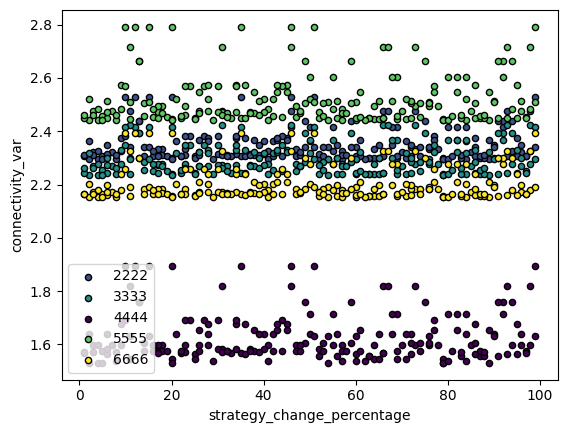

In [63]:
fig, ax = plt.subplots()
colors = {2222:'#3b528b', 3333:'#21918c', 4444:'#440154', 5555:'#5ec962', 6666:'#fde725'}

grouped = bounded_2_to_1_experiments_combined_with_outcomes.groupby('seed')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='strategy_change_percentage', y='connectivity_var', label=key, color=colors[key], edgecolor='black')
plt.savefig('bounded_2_to_1_scatter_conn_var_strategy_percentage.png', bbox_inches='tight')

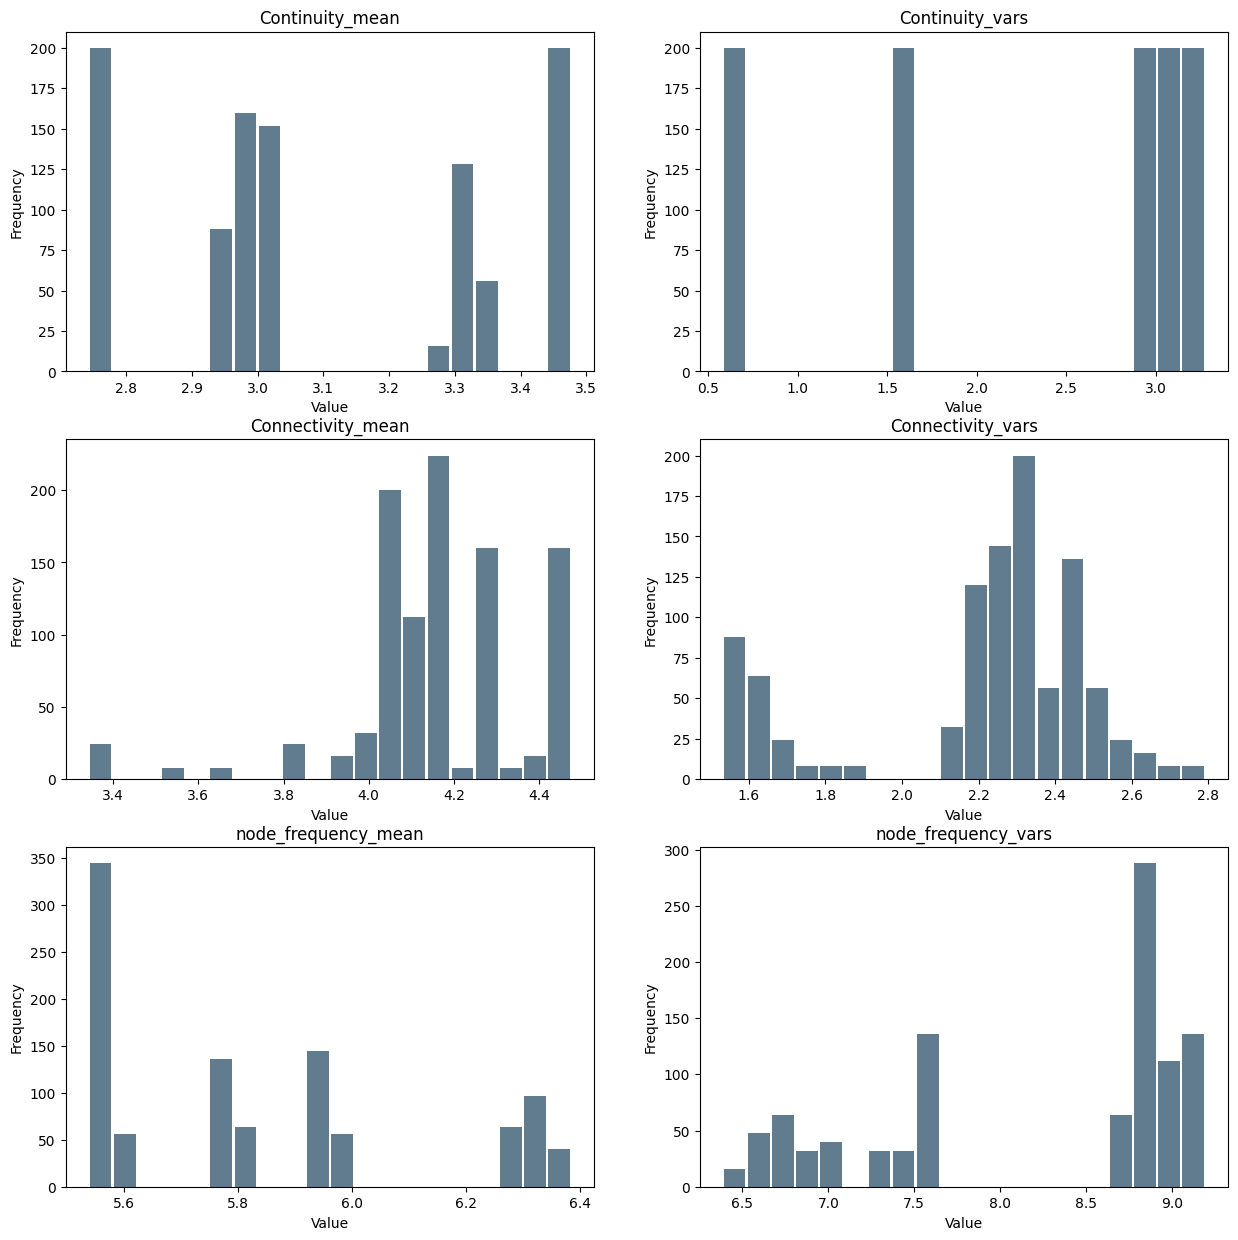

In [64]:
make_histogram_full(outcomes_combined_2_to_1)

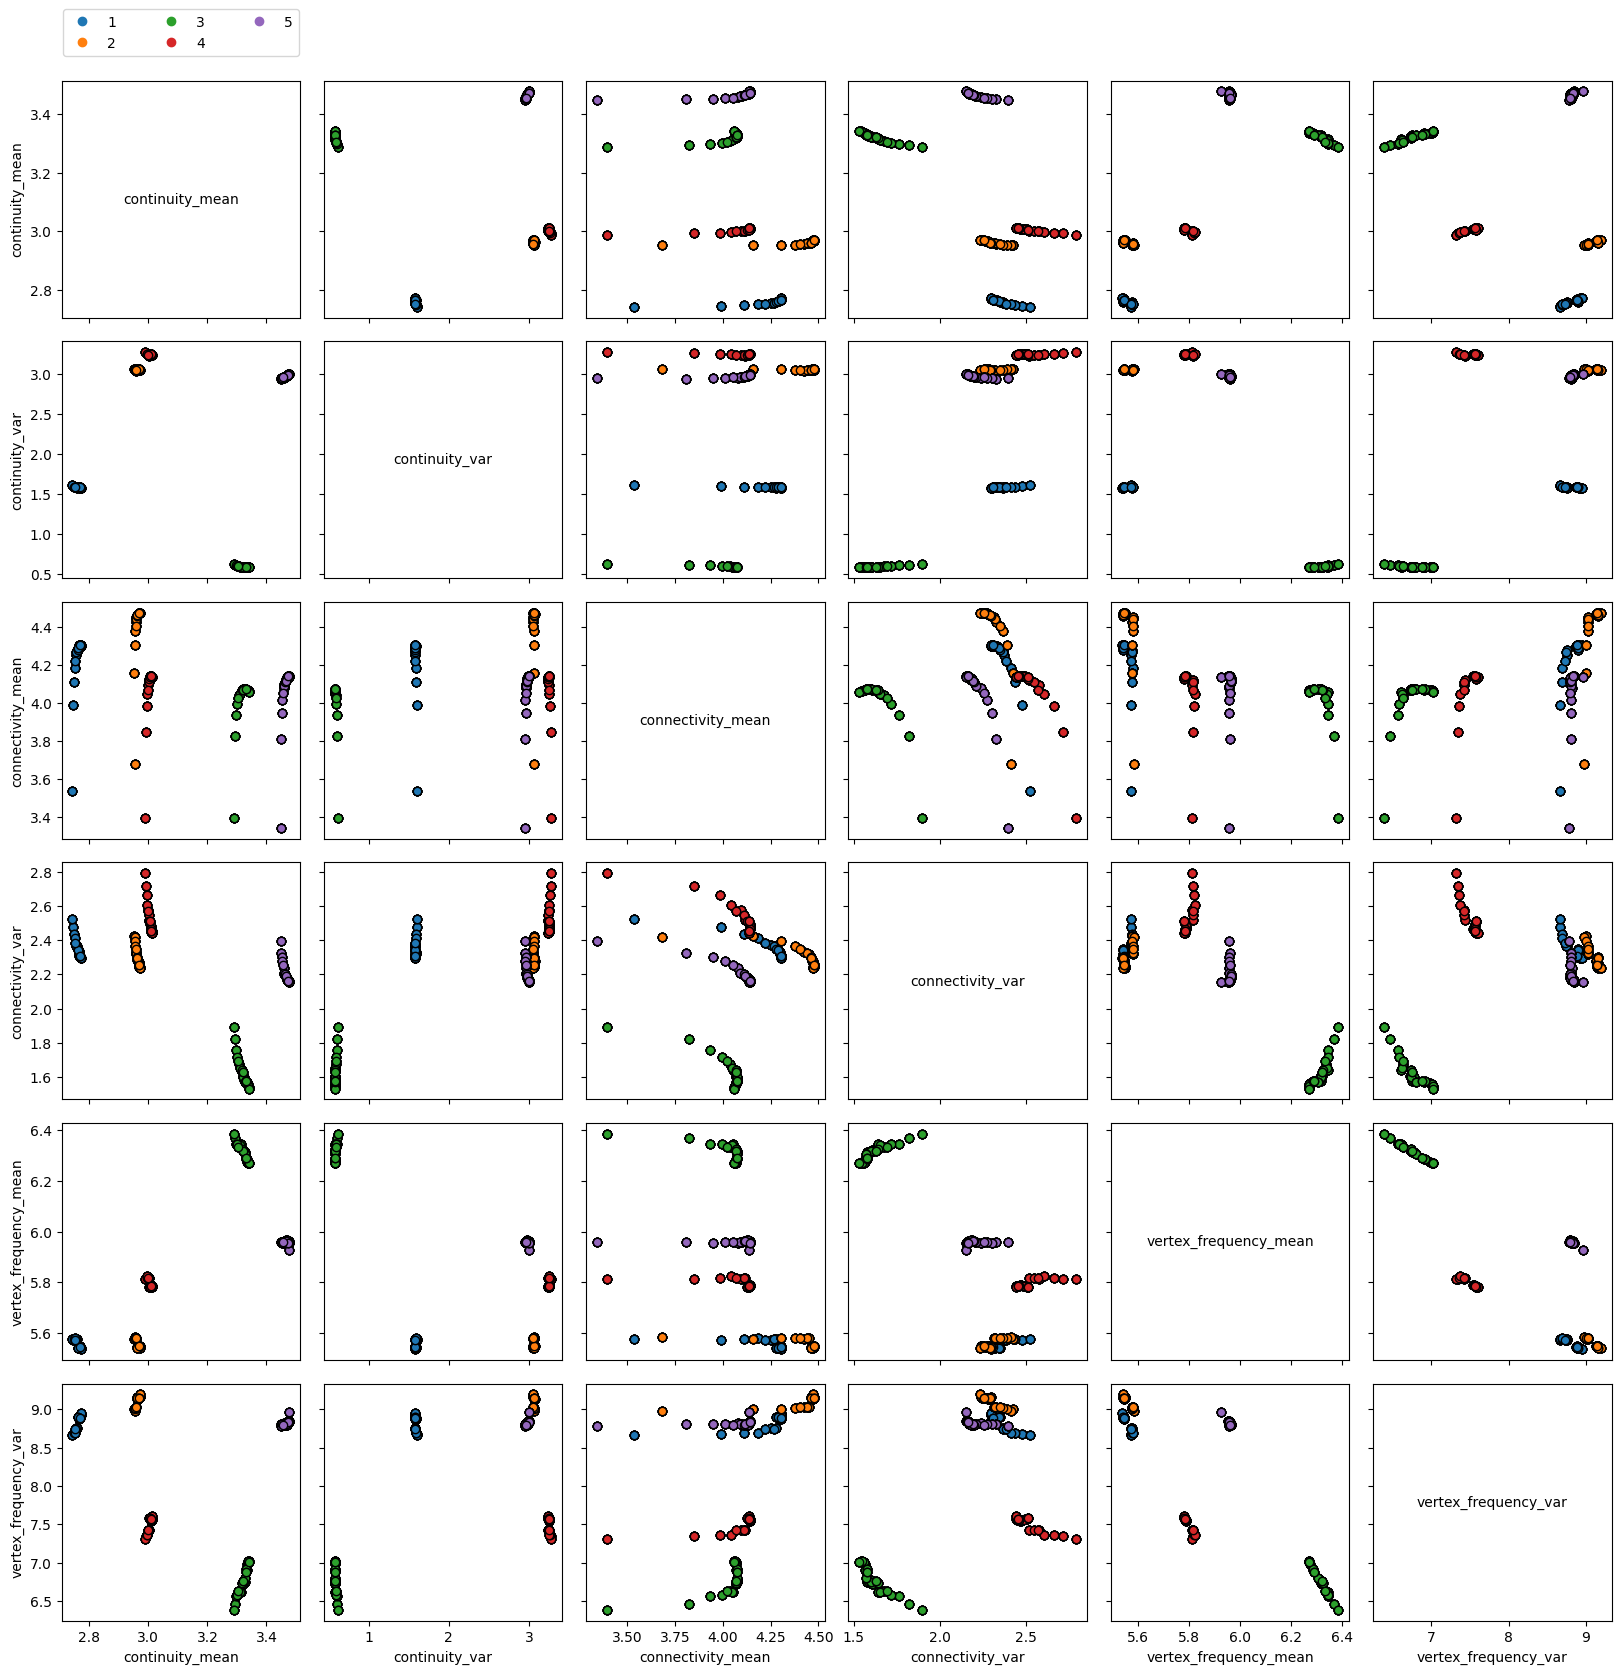

In [64]:
fig, axes = pairs_plotting.pairs_scatter(bounded_2_to_1_experiments_combined, outcomes_combined_2_to_1, group_by='Origin destination location set', grouping_specifiers = {1: 1, 2:2, 3:3, 4:4, 5:5}, legend=True)
fig.set_size_inches(20, 20)
# plt.show()

plt.savefig('corr_bounded_run_all_exp5.png', bbox_inches='tight')

### Correlation matrix

In [66]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var'])
p_mat = pd.DataFrame()
for value1 in ['num_of_paths', 'strategy_change_percentage']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments_combined[value1], outcomes_combined_2_to_1[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(bounded_2_to_1_experiments_combined[value1], outcomes_combined_2_to_1[value2])[1]
  

In [67]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,0.194911,-0.028069,0.308763,-0.267052,-0.117262,0.17786
strategy_change_percentage,-0.005886,-0.002578,-0.014738,0.008959,0.001359,-0.000798


In [68]:
corr_mat.to_excel('corr_mat_bounded_run_2_to_1_exp_to_outcomes.xlsx')

In [69]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
num_of_paths,1.823314e-19,0.193784,2.380185e-46,4.135818e-35,5.679251e-08,1.810498e-16
strategy_change_percentage,7.822685e-01,0.903636,4.889371e-01,6.740026e-01,9.491251e-01,9.701270e-01


In [70]:
p_mat.to_excel('p_mat_bounded_run_2_to_1_exp_to_outcomes.xlsx')

In [71]:
corr_mat = pd.DataFrame()
p_mat = pd.DataFrame()
for value1 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
    for value2 in ['continuity_mean', 'continuity_var', 'connectivity_mean',
       'connectivity_var', 'node_frequency_mean', 'node_frequency_var']:
        corr_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_2_to_1[value1], outcomes_combined_2_to_1[value2])[0]
        p_mat.at[value1, value2] = scipy.stats.kendalltau(outcomes_combined_2_to_1[value1], outcomes_combined_2_to_1[value2])[1]
 

In [72]:
corr_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,1.000000,-0.025806,-0.237677,-0.451355,0.515355,-0.131613
continuity_var,-0.025806,1.000000,0.203355,0.529548,-0.182194,0.170065
connectivity_mean,-0.237677,0.203355,1.000000,0.044129,-0.568516,0.648258
connectivity_var,-0.451355,0.529548,0.044129,1.000000,-0.294968,-0.013419
node_frequency_mean,0.515355,-0.182194,-0.568516,-0.294968,1.000000,-0.610065
node_frequency_var,-0.131613,0.170065,0.648258,-0.013419,-0.610065,1.000000


In [73]:
corr_mat.to_excel('corr_mat_bounded_run_2_to_1_outcomes_to_outcomes.xlsx')

In [74]:
p_mat

,continuity_mean,continuity_var,connectivity_mean,connectivity_var,node_frequency_mean,node_frequency_var
continuity_mean,0.000000e+00,2.249405e-01,5.326938e-29,5.729185e-100,9.870257e-130,6.061383e-10
continuity_var,2.249405e-01,0.000000e+00,1.151200e-21,7.270554e-137,1.059606e-17,1.275552e-15
connectivity_mean,5.326938e-29,1.151200e-21,0.000000e+00,3.797939e-02,1.930986e-157,4.377961e-204
connectivity_var,5.729185e-100,7.270554e-137,3.797939e-02,0.000000e+00,9.593934e-44,5.280290e-01
node_frequency_mean,9.870257e-130,1.059606e-17,1.930986e-157,9.593934e-44,0.000000e+00,5.537851e-181
node_frequency_var,6.061383e-10,1.275552e-15,4.377961e-204,5.280290e-01,5.537851e-181,0.000000e+00


In [75]:
p_mat.to_excel('p_mat_bounded_run_2_to_1_outcomes_to_outcomes.xlsx')